<a href="https://colab.research.google.com/github/harshareddyb/ML/blob/master/TelecomChurnCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Case Study

##### Group Members
- Harsha Vardhana Reddy Bingipalli
- Manmohan Nayak

### Problem Statement: 

For many incumbent telcom operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.



## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the telecom churn dataset

In [0]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
url = 'https://raw.githubusercontent.com/harshareddyb/ML/master/telecomChurnCaseStudy/telecom_churn_data.csv?token=AOEX5AKHIU5ZW4WQQ4HILYC6BD3PI'
telecomChurn = pd.read_csv(url)

In [0]:
# Local drive
#telecomChurn = pd.read_csv("telecom_churn_data.csv")


In [4]:
telecomChurn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
telecomChurn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
# circle_id 
telecomChurn["circle_id"].value_counts()

# There is single value for the circle_id column, hence there is no variance in the data
# Removing circle_id from the dataset
telecomChurn.drop(columns=['circle_id'], axis=1, inplace=True)
telecomChurn.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [0]:
# Segrigating the columns for the data understanding
columns_rest = ["mobile_number", "loc_og_t2o_mou", "std_og_t2o_mou",
                "loc_ic_t2o_mou", "aon", "aug_vbc_3g", "jul_vbc_3g", "jun_vbc_3g", "sep_vbc_3g"]


In [8]:
telecomChurn.loc[:, columns_rest].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 9 columns):
mobile_number     99999 non-null int64
loc_og_t2o_mou    98981 non-null float64
std_og_t2o_mou    98981 non-null float64
loc_ic_t2o_mou    98981 non-null float64
aon               99999 non-null int64
aug_vbc_3g        99999 non-null float64
jul_vbc_3g        99999 non-null float64
jun_vbc_3g        99999 non-null float64
sep_vbc_3g        99999 non-null float64
dtypes: float64(7), int64(2)
memory usage: 6.9 MB


In [9]:
round(100*(telecomChurn.loc[:, columns_rest].isnull().sum()/telecomChurn.loc[:, columns_rest].shape[0]),2)

mobile_number     0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
dtype: float64

In [10]:
telecomChurn.loc[:, columns_rest].describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,0.0,0.0,0.0,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,0.0,0.0,0.0,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,0.0,0.0,0.0,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,0.0,0.0,0.0,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,0.0,0.0,0.0,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,0.0,0.0,0.0,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [11]:
telecomChurn.loc[:, columns_rest].head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,968,30.4,0.0,101.20,3.58
1,7001865778,0.0,0.0,0.0,1006,0.0,0.0,0.00,0.00
2,7001625959,0.0,0.0,0.0,1103,0.0,0.0,4.17,0.00
3,7001204172,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00
4,7000142493,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00


In [12]:
telecomChurn["loc_og_t2o_mou"].value_counts(dropna=False)

0.0    98981
NaN     1018
Name: loc_og_t2o_mou, dtype: int64

In [13]:
telecomChurn["std_og_t2o_mou"].value_counts(dropna=False)

0.0    98981
NaN     1018
Name: std_og_t2o_mou, dtype: int64

In [14]:
telecomChurn["loc_ic_t2o_mou"].value_counts(dropna=False)

0.0    98981
NaN     1018
Name: loc_ic_t2o_mou, dtype: int64

In [0]:
# We can drop the minutes of usage (voice call) columns (loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou) 
# as 99% values are zero and remainig are NaN

telecomChurn.drop(columns=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1, inplace=True)

# Reset the columns_rest
columns_rest = ["mobile_number", "aon", "aug_vbc_3g", "jul_vbc_3g", "jun_vbc_3g", "sep_vbc_3g"]


In [16]:
round(100*(telecomChurn.loc[:, columns_rest].isnull().sum()/telecomChurn.loc[:, columns_rest].shape[0]),2)

mobile_number    0.0
aon              0.0
aug_vbc_3g       0.0
jul_vbc_3g       0.0
jun_vbc_3g       0.0
sep_vbc_3g       0.0
dtype: float64

In [17]:
# Analyse columns_month_6
telecomChurn.loc[:, telecomChurn.columns.str.endswith("_6")].head()

,last_date_of_month_6,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,6/30/2014,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,6/21/2014,252,6/21/2014,1.0,252.0,0.0,1.0,252.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0
1,6/30/2014,34.047,24.11,15.74,0.0,0.0,23.88,11.51,0.00,0.0,35.39,0.23,0.00,0.00,0.0,0.23,0.0,4.68,0.00,40.31,1.61,17.48,0.00,19.09,0.00,5.90,0.00,0.0,5.90,26.83,0.00,1.83,0.00,4,74,44,6/29/2014,44,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
2,6/30/2014,167.690,11.54,143.33,0.0,0.0,7.19,29.34,24.11,0.0,60.66,4.34,41.81,1.48,0.0,47.64,0.0,46.56,0.45,155.33,115.69,14.38,99.48,229.56,72.41,45.18,21.73,0.0,139.33,370.04,0.21,0.00,0.93,5,168,86,6/17/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
3,6/30/2014,221.338,99.91,123.31,0.0,0.0,73.68,107.43,1.91,0.0,183.03,26.23,2.99,0.00,0.0,29.23,0.0,10.96,0.00,223.23,62.08,113.96,57.43,233.48,43.48,1.33,1.18,0.0,45.99,280.08,0.59,0.00,0.00,10,230,60,6/28/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,6/30/2014,261.636,50.31,76.96,0.0,0.0,50.31,67.64,0.00,0.0,117.96,0.00,9.31,0.00,0.0,9.31,0.0,0.00,0.00,127.28,105.68,106.84,1.50,214.03,0.00,1.93,0.00,0.0,1.93,216.44,0.00,0.00,0.48,5,196,56,6/26/2014,50,6/4/2014,1.0,56.0,1.0,0.0,56.0,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0.0


In [18]:
round(100*(telecomChurn.loc[:, telecomChurn.columns.str.endswith("_6")].isnull().sum()/telecomChurn.loc[:, telecomChurn.columns.str.endswith("_6")].shape[0]),2)

last_date_of_month_6         0.00
arpu_6                       0.00
onnet_mou_6                  3.94
offnet_mou_6                 3.94
roam_ic_mou_6                3.94
roam_og_mou_6                3.94
loc_og_t2t_mou_6             3.94
loc_og_t2m_mou_6             3.94
loc_og_t2f_mou_6             3.94
loc_og_t2c_mou_6             3.94
loc_og_mou_6                 3.94
std_og_t2t_mou_6             3.94
std_og_t2m_mou_6             3.94
std_og_t2f_mou_6             3.94
std_og_t2c_mou_6             3.94
std_og_mou_6                 3.94
isd_og_mou_6                 3.94
spl_og_mou_6                 3.94
og_others_6                  3.94
total_og_mou_6               0.00
loc_ic_t2t_mou_6             3.94
loc_ic_t2m_mou_6             3.94
loc_ic_t2f_mou_6             3.94
loc_ic_mou_6                 3.94
std_ic_t2t_mou_6             3.94
std_ic_t2m_mou_6             3.94
std_ic_t2f_mou_6             3.94
std_ic_t2o_mou_6             3.94
std_ic_mou_6                 3.94
total_ic_mou_6

In [0]:
# It appears to be customers who don't have data data service are marked as NaN 
# Hence impute 0 for the below data service related columns
telecomChurn["total_rech_data_6"].fillna(0, inplace=True)
telecomChurn["max_rech_data_6"].fillna(0, inplace=True)
telecomChurn["count_rech_2g_6"].fillna(0, inplace=True)
telecomChurn["count_rech_3g_6"].fillna(0, inplace=True)
telecomChurn["av_rech_amt_data_6"].fillna(0, inplace=True)
telecomChurn["arpu_3g_6"].fillna(0, inplace=True)
telecomChurn["arpu_2g_6"].fillna(0, inplace=True)
telecomChurn["night_pck_user_6"].fillna(0, inplace=True)
telecomChurn["fb_user_6"].fillna(0, inplace=True)

In [20]:
round(100*(telecomChurn.loc[:, telecomChurn.columns.str.endswith("_6")].isnull().sum()/telecomChurn.loc[:, telecomChurn.columns.str.endswith("_6")].shape[0]),2)

last_date_of_month_6         0.00
arpu_6                       0.00
onnet_mou_6                  3.94
offnet_mou_6                 3.94
roam_ic_mou_6                3.94
roam_og_mou_6                3.94
loc_og_t2t_mou_6             3.94
loc_og_t2m_mou_6             3.94
loc_og_t2f_mou_6             3.94
loc_og_t2c_mou_6             3.94
loc_og_mou_6                 3.94
std_og_t2t_mou_6             3.94
std_og_t2m_mou_6             3.94
std_og_t2f_mou_6             3.94
std_og_t2c_mou_6             3.94
std_og_mou_6                 3.94
isd_og_mou_6                 3.94
spl_og_mou_6                 3.94
og_others_6                  3.94
total_og_mou_6               0.00
loc_ic_t2t_mou_6             3.94
loc_ic_t2m_mou_6             3.94
loc_ic_t2f_mou_6             3.94
loc_ic_mou_6                 3.94
std_ic_t2t_mou_6             3.94
std_ic_t2m_mou_6             3.94
std_ic_t2f_mou_6             3.94
std_ic_t2o_mou_6             3.94
std_ic_mou_6                 3.94
total_ic_mou_6

In [21]:
# Dealing with Date if last reacharge (voice and data)
# Deriving the new features from these dates and droping the date columns
telecomChurn[["date_of_last_rech_data_6", "date_of_last_rech_6"]].head()


,date_of_last_rech_data_6,date_of_last_rech_6
0,6/21/2014,6/21/2014
1,NaN,6/29/2014
2,NaN,6/17/2014
3,NaN,6/28/2014
4,6/4/2014,6/26/2014


In [0]:
telecomChurn['date_of_last_rech_data_6'] = pd.to_datetime(telecomChurn['date_of_last_rech_data_6'])
telecomChurn['date_of_last_rech_6'] = pd.to_datetime(telecomChurn['date_of_last_rech_6'])

In [0]:
# Deriving the day of the month from the dates
telecomChurn['day_of_last_rech_data_6'] = telecomChurn["date_of_last_rech_data_6"].apply(lambda x:x.day if pd.notnull(x) else 0)
telecomChurn['day_of_last_rech_6'] = telecomChurn["date_of_last_rech_6"].apply(lambda x:x.day if pd.notnull(x) else 0)

In [0]:
# Drop date coulmns "date_of_last_rech_data_6", "date_of_last_rech_6"
telecomChurn.drop(columns=["date_of_last_rech_data_6", "date_of_last_rech_6"], axis=1, inplace=True)

In [25]:
round(100*(telecomChurn.loc[:, telecomChurn.columns.str.endswith("_6")].isnull().sum()/telecomChurn.loc[:, telecomChurn.columns.str.endswith("_6")].shape[0]),2)

last_date_of_month_6       0.00
arpu_6                     0.00
onnet_mou_6                3.94
offnet_mou_6               3.94
roam_ic_mou_6              3.94
roam_og_mou_6              3.94
loc_og_t2t_mou_6           3.94
loc_og_t2m_mou_6           3.94
loc_og_t2f_mou_6           3.94
loc_og_t2c_mou_6           3.94
loc_og_mou_6               3.94
std_og_t2t_mou_6           3.94
std_og_t2m_mou_6           3.94
std_og_t2f_mou_6           3.94
std_og_t2c_mou_6           3.94
std_og_mou_6               3.94
isd_og_mou_6               3.94
spl_og_mou_6               3.94
og_others_6                3.94
total_og_mou_6             0.00
loc_ic_t2t_mou_6           3.94
loc_ic_t2m_mou_6           3.94
loc_ic_t2f_mou_6           3.94
loc_ic_mou_6               3.94
std_ic_t2t_mou_6           3.94
std_ic_t2m_mou_6           3.94
std_ic_t2f_mou_6           3.94
std_ic_t2o_mou_6           3.94
std_ic_mou_6               3.94
total_ic_mou_6             0.00
spl_ic_mou_6               3.94
isd_ic_m

In [26]:
telecomChurn['onnet_mou_6'].value_counts(dropna=False)

0.00      8928
NaN       3937
0.33        80
0.26        76
0.48        75
          ... 
202.88       1
249.33       1
742.68       1
360.39       1
205.78       1
Name: onnet_mou_6, Length: 24314, dtype: int64

In [27]:
# Impute NaN values for onnet_mou_6
telecomChurn.loc[:, telecomChurn.columns.str.startswith("onnet_mou")].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000
mean,132.395875,133.670805,133.018098,130.302327
std,297.207406,308.794148,308.951589,308.477668
min,0.000000,0.000000,0.000000,0.000000
25%,7.380000,6.660000,6.460000,5.330000
50%,34.310000,32.330000,32.360000,29.840000
75%,118.740000,115.595000,115.860000,112.130000
max,7376.710000,8157.780000,10752.560000,10427.460000


In [28]:
print(telecomChurn.loc[:, telecomChurn.columns.str.startswith("onnet_mou")].median())

onnet_mou_6    34.31
onnet_mou_7    32.33
onnet_mou_8    32.36
onnet_mou_9    29.84
dtype: float64


In [0]:
# Impute NaN values with median value
imp_cols = ['onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou',
            'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou',
            'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou',
            'spl_og_mou', 'og_others', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 
            'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou',
            'std_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others']

for col in imp_cols:
    telecomChurn[col + '_6']=telecomChurn[col + '_6'].fillna(telecomChurn[col + '_6'].median())
    telecomChurn[col + '_7']=telecomChurn[col + '_7'].fillna(telecomChurn[col + '_7'].median())
    telecomChurn[col + '_8']=telecomChurn[col + '_8'].fillna(telecomChurn[col + '_8'].median())
    telecomChurn[col + '_9']=telecomChurn[col + '_9'].fillna(telecomChurn[col + '_9'].median())
    

In [30]:
round(100*(telecomChurn.loc[:, telecomChurn.columns.str.endswith("_6")].isnull().sum()/telecomChurn.loc[:, telecomChurn.columns.str.endswith("_6")].shape[0]),2)

last_date_of_month_6       0.0
arpu_6                     0.0
onnet_mou_6                0.0
offnet_mou_6               0.0
roam_ic_mou_6              0.0
roam_og_mou_6              0.0
loc_og_t2t_mou_6           0.0
loc_og_t2m_mou_6           0.0
loc_og_t2f_mou_6           0.0
loc_og_t2c_mou_6           0.0
loc_og_mou_6               0.0
std_og_t2t_mou_6           0.0
std_og_t2m_mou_6           0.0
std_og_t2f_mou_6           0.0
std_og_t2c_mou_6           0.0
std_og_mou_6               0.0
isd_og_mou_6               0.0
spl_og_mou_6               0.0
og_others_6                0.0
total_og_mou_6             0.0
loc_ic_t2t_mou_6           0.0
loc_ic_t2m_mou_6           0.0
loc_ic_t2f_mou_6           0.0
loc_ic_mou_6               0.0
std_ic_t2t_mou_6           0.0
std_ic_t2m_mou_6           0.0
std_ic_t2f_mou_6           0.0
std_ic_t2o_mou_6           0.0
std_ic_mou_6               0.0
total_ic_mou_6             0.0
spl_ic_mou_6               0.0
isd_ic_mou_6               0.0
ic_other

In [31]:
# Analyse columns_month_7
telecomChurn.loc[:, telecomChurn.columns.str.endswith("_7")].head()

,last_date_of_month_7,arpu_7,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_t2c_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_t2o_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,last_day_rch_amt_7,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7,fb_user_7
0,7/31/2014,214.816,32.33,91.735,0.00,0.00,11.61,40.43,0.00,0.00,63.685,0.00,3.635,0.00,0.0,11.09,0.0,0.00,0.0,0.00,15.74,57.08,0.93,92.55,0.00,2.04,0.00,0.0,5.96,0.00,0.0,0.00,0.00,3,252,252,7/16/2014,252,7/16/2014,1.0,252.0,0.0,1.0,252.0,1.32,150.76,212.17,212.17,0.0,0,0,1,0,1.0
1,7/31/2014,355.074,78.68,99.840,0.00,0.00,74.56,75.94,0.00,2.91,150.510,4.11,0.460,0.00,0.0,4.58,0.0,23.43,0.0,178.53,29.91,65.38,8.93,104.23,0.00,0.00,0.00,0.0,0.00,104.23,0.0,0.00,0.00,9,384,154,7/31/2014,23,7/25/2014,1.0,154.0,1.0,0.0,154.0,108.07,0.00,0.00,28.61,0.0,1,0,0,0,1.0
2,7/31/2014,189.058,55.24,220.590,0.00,0.00,28.74,16.86,21.79,135.54,67.410,26.49,67.410,14.76,0.0,108.68,0.0,236.84,0.0,412.94,71.11,15.44,122.29,208.86,71.29,177.01,58.34,0.0,306.66,519.53,0.0,0.85,3.14,4,315,200,7/24/2014,200,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
3,7/31/2014,251.102,54.39,109.010,54.86,28.09,34.81,83.21,0.65,0.00,118.680,14.89,1.730,0.00,0.0,16.63,0.0,0.00,0.0,135.31,19.98,64.51,27.09,111.59,66.44,38.56,0.00,0.0,105.01,216.61,0.0,0.00,0.00,11,310,50,7/31/2014,50,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,7/31/2014,309.876,149.44,91.880,0.00,0.00,149.44,91.88,0.00,0.00,241.330,0.00,0.000,0.00,0.0,0.00,0.0,0.00,0.0,241.33,88.49,109.54,0.00,198.04,0.00,0.25,0.00,0.0,0.25,198.29,0.0,0.00,0.00,6,350,110,7/28/2014,110,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN


In [32]:
round(100*(telecomChurn.loc[:, telecomChurn.columns.str.endswith("_7")].isnull().sum()/telecomChurn.loc[:, telecomChurn.columns.str.endswith("_7")].shape[0]),2)

last_date_of_month_7         0.60
arpu_7                       0.00
onnet_mou_7                  0.00
offnet_mou_7                 0.00
roam_ic_mou_7                0.00
roam_og_mou_7                0.00
loc_og_t2t_mou_7             0.00
loc_og_t2m_mou_7             0.00
loc_og_t2f_mou_7             0.00
loc_og_t2c_mou_7             0.00
loc_og_mou_7                 0.00
std_og_t2t_mou_7             0.00
std_og_t2m_mou_7             0.00
std_og_t2f_mou_7             0.00
std_og_t2c_mou_7             0.00
std_og_mou_7                 0.00
isd_og_mou_7                 0.00
spl_og_mou_7                 0.00
og_others_7                  0.00
total_og_mou_7               0.00
loc_ic_t2t_mou_7             0.00
loc_ic_t2m_mou_7             0.00
loc_ic_t2f_mou_7             0.00
loc_ic_mou_7                 0.00
std_ic_t2t_mou_7             0.00
std_ic_t2m_mou_7             0.00
std_ic_t2f_mou_7             0.00
std_ic_t2o_mou_7             0.00
std_ic_mou_7                 0.00
total_ic_mou_7

In [0]:
# It appears to be customers who don't have data data service are marked as NaN 
# Hence impute 0 for the below data service related columns
telecomChurn["total_rech_data_7"].fillna(0, inplace=True)
telecomChurn["max_rech_data_7"].fillna(0, inplace=True)
telecomChurn["count_rech_2g_7"].fillna(0, inplace=True)
telecomChurn["count_rech_3g_7"].fillna(0, inplace=True)
telecomChurn["av_rech_amt_data_7"].fillna(0, inplace=True)
telecomChurn["arpu_3g_7"].fillna(0, inplace=True)
telecomChurn["arpu_2g_7"].fillna(0, inplace=True)
telecomChurn["night_pck_user_7"].fillna(0, inplace=True)
telecomChurn["fb_user_7"].fillna(0, inplace=True)

telecomChurn["total_rech_data_8"].fillna(0, inplace=True)
telecomChurn["max_rech_data_8"].fillna(0, inplace=True)
telecomChurn["count_rech_2g_8"].fillna(0, inplace=True)
telecomChurn["count_rech_3g_8"].fillna(0, inplace=True)
telecomChurn["av_rech_amt_data_8"].fillna(0, inplace=True)
telecomChurn["arpu_3g_8"].fillna(0, inplace=True)
telecomChurn["arpu_2g_8"].fillna(0, inplace=True)
telecomChurn["night_pck_user_8"].fillna(0, inplace=True)
telecomChurn["fb_user_8"].fillna(0, inplace=True)

telecomChurn["total_rech_data_9"].fillna(0, inplace=True)
telecomChurn["max_rech_data_9"].fillna(0, inplace=True)
telecomChurn["count_rech_2g_9"].fillna(0, inplace=True)
telecomChurn["count_rech_3g_9"].fillna(0, inplace=True)
telecomChurn["av_rech_amt_data_9"].fillna(0, inplace=True)
telecomChurn["arpu_3g_9"].fillna(0, inplace=True)
telecomChurn["arpu_2g_9"].fillna(0, inplace=True)
telecomChurn["night_pck_user_9"].fillna(0, inplace=True)
telecomChurn["fb_user_9"].fillna(0, inplace=True)

In [0]:
# Dealing with Date if last reacharge (voice and data)
# Deriving the new features from these dates and droping the date columns

telecomChurn['date_of_last_rech_data_7'] = pd.to_datetime(telecomChurn['date_of_last_rech_data_7'])
telecomChurn['date_of_last_rech_7'] = pd.to_datetime(telecomChurn['date_of_last_rech_7'])

telecomChurn['date_of_last_rech_data_8'] = pd.to_datetime(telecomChurn['date_of_last_rech_data_8'])
telecomChurn['date_of_last_rech_8'] = pd.to_datetime(telecomChurn['date_of_last_rech_8'])

telecomChurn['date_of_last_rech_data_9'] = pd.to_datetime(telecomChurn['date_of_last_rech_data_9'])
telecomChurn['date_of_last_rech_9'] = pd.to_datetime(telecomChurn['date_of_last_rech_9'])

# Deriving the day of the month from the dates
telecomChurn['day_of_last_rech_data_7'] = telecomChurn["date_of_last_rech_data_7"].apply(lambda x:x.day if pd.notnull(x) else 0)
telecomChurn['day_of_last_rech_7'] = telecomChurn["date_of_last_rech_7"].apply(lambda x:x.day if pd.notnull(x) else 0)

telecomChurn['day_of_last_rech_data_8'] = telecomChurn["date_of_last_rech_data_8"].apply(lambda x:x.day if pd.notnull(x) else 0)
telecomChurn['day_of_last_rech_8'] = telecomChurn["date_of_last_rech_8"].apply(lambda x:x.day if pd.notnull(x) else 0)

telecomChurn['day_of_last_rech_data_9'] = telecomChurn["date_of_last_rech_data_9"].apply(lambda x:x.day if pd.notnull(x) else 0)
telecomChurn['day_of_last_rech_9'] = telecomChurn["date_of_last_rech_9"].apply(lambda x:x.day if pd.notnull(x) else 0)

# Drop date coulmns "date_of_last_rech_data_6", "date_of_last_rech_6"
telecomChurn.drop(columns=["date_of_last_rech_data_7", "date_of_last_rech_7", 'date_of_last_rech_data_8', 'date_of_last_rech_8', "date_of_last_rech_data_9", "date_of_last_rech_9"], axis=1, inplace=True)

In [35]:
round(100*(telecomChurn.loc[:, telecomChurn.columns.str.endswith("_7")].isnull().sum()/telecomChurn.loc[:, telecomChurn.columns.str.endswith("_7")].shape[0]),2)

last_date_of_month_7       0.6
arpu_7                     0.0
onnet_mou_7                0.0
offnet_mou_7               0.0
roam_ic_mou_7              0.0
roam_og_mou_7              0.0
loc_og_t2t_mou_7           0.0
loc_og_t2m_mou_7           0.0
loc_og_t2f_mou_7           0.0
loc_og_t2c_mou_7           0.0
loc_og_mou_7               0.0
std_og_t2t_mou_7           0.0
std_og_t2m_mou_7           0.0
std_og_t2f_mou_7           0.0
std_og_t2c_mou_7           0.0
std_og_mou_7               0.0
isd_og_mou_7               0.0
spl_og_mou_7               0.0
og_others_7                0.0
total_og_mou_7             0.0
loc_ic_t2t_mou_7           0.0
loc_ic_t2m_mou_7           0.0
loc_ic_t2f_mou_7           0.0
loc_ic_mou_7               0.0
std_ic_t2t_mou_7           0.0
std_ic_t2m_mou_7           0.0
std_ic_t2f_mou_7           0.0
std_ic_t2o_mou_7           0.0
std_ic_mou_7               0.0
total_ic_mou_7             0.0
spl_ic_mou_7               0.0
isd_ic_mou_7               0.0
ic_other

In [36]:
round(100*(telecomChurn.loc[:, telecomChurn.columns.str.endswith("_8")].isnull().sum()/telecomChurn.loc[:, telecomChurn.columns.str.endswith("_8")].shape[0]),2)

last_date_of_month_8       1.1
arpu_8                     0.0
onnet_mou_8                0.0
offnet_mou_8               0.0
roam_ic_mou_8              0.0
roam_og_mou_8              0.0
loc_og_t2t_mou_8           0.0
loc_og_t2m_mou_8           0.0
loc_og_t2f_mou_8           0.0
loc_og_t2c_mou_8           0.0
loc_og_mou_8               0.0
std_og_t2t_mou_8           0.0
std_og_t2m_mou_8           0.0
std_og_t2f_mou_8           0.0
std_og_t2c_mou_8           0.0
std_og_mou_8               0.0
isd_og_mou_8               0.0
spl_og_mou_8               0.0
og_others_8                0.0
total_og_mou_8             0.0
loc_ic_t2t_mou_8           0.0
loc_ic_t2m_mou_8           0.0
loc_ic_t2f_mou_8           0.0
loc_ic_mou_8               0.0
std_ic_t2t_mou_8           0.0
std_ic_t2m_mou_8           0.0
std_ic_t2f_mou_8           0.0
std_ic_t2o_mou_8           0.0
std_ic_mou_8               0.0
total_ic_mou_8             0.0
spl_ic_mou_8               0.0
isd_ic_mou_8               0.0
ic_other

In [37]:
round(100*(telecomChurn.loc[:, telecomChurn.columns.str.endswith("_9")].isnull().sum()/telecomChurn.loc[:, telecomChurn.columns.str.endswith("_9")].shape[0]),2)

last_date_of_month_9       1.66
arpu_9                     0.00
onnet_mou_9                0.00
offnet_mou_9               0.00
roam_ic_mou_9              0.00
roam_og_mou_9              0.00
loc_og_t2t_mou_9           0.00
loc_og_t2m_mou_9           0.00
loc_og_t2f_mou_9           0.00
loc_og_t2c_mou_9           0.00
loc_og_mou_9               0.00
std_og_t2t_mou_9           0.00
std_og_t2m_mou_9           0.00
std_og_t2f_mou_9           0.00
std_og_t2c_mou_9           0.00
std_og_mou_9               0.00
isd_og_mou_9               0.00
spl_og_mou_9               0.00
og_others_9                0.00
total_og_mou_9             0.00
loc_ic_t2t_mou_9           0.00
loc_ic_t2m_mou_9           0.00
loc_ic_t2f_mou_9           0.00
loc_ic_mou_9               0.00
std_ic_t2t_mou_9           0.00
std_ic_t2m_mou_9           0.00
std_ic_t2f_mou_9           0.00
std_ic_t2o_mou_9           0.00
std_ic_mou_9               0.00
total_ic_mou_9             0.00
spl_ic_mou_9               0.00
isd_ic_m

In [38]:
telecomChurn.shape

(99999, 222)

In [39]:
print(telecomChurn.last_date_of_month_6.value_counts(dropna=False))
print(telecomChurn.last_date_of_month_7.value_counts(dropna=False))
print(telecomChurn.last_date_of_month_8.value_counts(dropna=False))
print(telecomChurn.last_date_of_month_9.value_counts(dropna=False))

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
7/31/2014    99398
NaN            601
Name: last_date_of_month_7, dtype: int64
8/31/2014    98899
NaN           1100
Name: last_date_of_month_8, dtype: int64
9/30/2014    98340
NaN           1659
Name: last_date_of_month_9, dtype: int64


In [0]:
# We can drop the last_date of the month which has single value and don't have any variance in the pridiction
telecomChurn.drop(columns=["last_date_of_month_6", "last_date_of_month_7", 'last_date_of_month_8', 'last_date_of_month_9'], axis=1, inplace=True)

In [41]:
telecomChurn.columns[telecomChurn.isnull().any()].tolist()

[]

In [0]:
telecomChurn.loc[:, (telecomChurn == 0).all()]
# Drop columns which are having all zero values, which are not useful for the analysis
telecomChurn.loc[:, (telecomChurn == 0).all()]
telecomChurn.drop(columns=['std_og_t2c_mou_6', 'std_og_t2c_mou_7','std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6','std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], axis=1, inplace=True)

### Step 2: Filtering High-Value Customers (HVC)

In [0]:
# Total voice recharge is captured in total_rech_amt and
# Total data recharge is captured in the av_rech_amt_data_6
# As per the problem statement good months are 6 and 7


In [43]:
telecomChurn[['total_rech_amt_6', 'av_rech_amt_data_6', 'total_rech_amt_7', 'av_rech_amt_data_7']].head(20) 

,total_rech_amt_6,av_rech_amt_data_6,total_rech_amt_7,av_rech_amt_data_7
0,362,252.0,252,252.0
1,74,0.0,384,154.0
2,168,0.0,315,0.0
3,230,0.0,310,0.0
4,196,56.0,350,0.0
5,120,0.0,0,0.0
6,499,0.0,222,0.0
7,1580,0.0,790,0.0
8,437,0.0,601,177.0
9,220,0.0,195,154.0


In [44]:
telecomChurn['total_good_months_recharge_amount'] = telecomChurn.total_rech_amt_6 + telecomChurn.av_rech_amt_data_6 + telecomChurn.total_rech_amt_7 + telecomChurn.av_rech_amt_data_7
telecomChurn.total_good_months_recharge_amount.head()

0    1118.0
1     612.0
2     483.0
3     540.0
4     602.0
Name: total_good_months_recharge_amount, dtype: float64

In [45]:
telecomChurn.total_good_months_recharge_amount.describe(percentiles=[0.1, .25, .5, .7, .8, .9, .95])

count    99999.000000
mean       750.316434
std        844.893011
min          0.000000
10%        120.000000
25%        250.000000
50%        527.000000
70%        862.000000
80%       1122.000000
90%       1616.000000
95%       2151.100000
max      75525.000000
Name: total_good_months_recharge_amount, dtype: float64

In [0]:
# Here 70% percentile is 862,
# Hence High Value customers are who have recharged more than or equal to 862 rupees (both voice and data)
# in month of June and July

In [0]:
hvc_df = telecomChurn[telecomChurn.total_good_months_recharge_amount>=862]

In [48]:
hvc_df.shape

(30015, 211)

#### Approximately 30K customers have been identified as high value customers (HVC)

### Step 3: Deriving the Churn label 

In [0]:
# Based on the problem statement we use September month(9) data for deriving the Churn label
# these are attributes which are used 
# total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [50]:
criteria_1 = hvc_df.total_ic_mou_9 <= 0
criteria_2 = hvc_df.total_og_mou_9 <=0
criteria_3 = hvc_df.vol_2g_mb_9<=0
criteria_4 = hvc_df.vol_3g_mb_9<=0
hvc_df[criteria_1 & criteria_2 & criteria_3 & criteria_4].shape

(2460, 211)

#### Based on this there are 2460 customers are high risk of Churining

In [0]:
# Tag the Churn label to the dataframe based on above condition

def labelChurn(row):
    if(row.total_ic_mou_9<=0 and row.total_og_mou_9 <=0 and row.vol_2g_mb_9<=0 and row.vol_3g_mb_9<=0):
        return 1
    else:
        return 0

hvc_df['churn'] = hvc_df.apply(labelChurn, axis=1)

In [52]:
hvc_df[hvc_df.churn==1].shape

(2460, 212)

In [0]:
# Drop total_good_months_recharge_amount, mobile_number which are not useful for modeling
hvc_df.drop(columns=['total_good_months_recharge_amount', 'mobile_number'], axis=1, inplace=True)

In [0]:
# removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
hvc_df.drop(columns=[f for f in hvc_df.columns if f.endswith("_9")], axis=1, inplace=True)


In [55]:
hvc_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30015 entries, 0 to 99998
Data columns (total 159 columns):
arpu_6                     float64
arpu_7                     float64
arpu_8                     float64
onnet_mou_6                float64
onnet_mou_7                float64
onnet_mou_8                float64
offnet_mou_6               float64
offnet_mou_7               float64
offnet_mou_8               float64
roam_ic_mou_6              float64
roam_ic_mou_7              float64
roam_ic_mou_8              float64
roam_og_mou_6              float64
roam_og_mou_7              float64
roam_og_mou_8              float64
loc_og_t2t_mou_6           float64
loc_og_t2t_mou_7           float64
loc_og_t2t_mou_8           float64
loc_og_t2m_mou_6           float64
loc_og_t2m_mou_7           float64
loc_og_t2m_mou_8           float64
loc_og_t2f_mou_6           float64
loc_og_t2f_mou_7           float64
loc_og_t2f_mou_8           float64
loc_og_t2c_mou_6           float64
loc_og_t2c_mou_

In [56]:
hvc_df['churn'].value_counts(normalize=True) * 100

0    91.804098
1     8.195902
Name: churn, dtype: float64

#### Approximately 8.2% Churn rate has been identified

### Step 4: EDA 

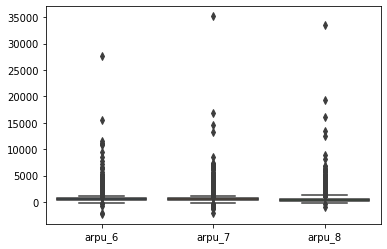

In [57]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['arpu_6','arpu_7', 'arpu_8']])

In [0]:
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['arpu_6'] > 5000) | (hvc_df['arpu_7'] > 5000) | (hvc_df['arpu_8'] > 5000))]
hvc_df = hvc_df[~((hvc_df['arpu_6'] < 0) | (hvc_df['arpu_7'] < 0) | (hvc_df['arpu_8'] < 0))]

In [59]:
hvc_df.shape

(29830, 159)

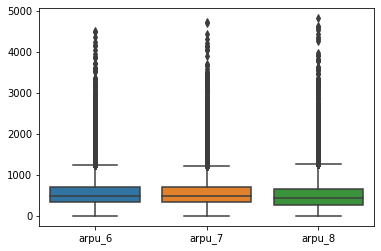

In [60]:
ax = sns.boxplot( data=hvc_df[['arpu_6','arpu_7', 'arpu_8']])

In [61]:
hvc_df['churn'].value_counts(normalize=True) * 100

0    92.018103
1     7.981897
Name: churn, dtype: float64

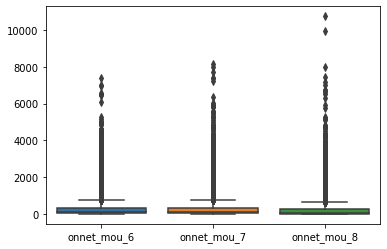

In [62]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['onnet_mou_6','onnet_mou_7', 'onnet_mou_8']])

In [0]:
hvc_df[((hvc_df['onnet_mou_6'] > 5000) | (hvc_df['onnet_mou_7'] > 5000) | (hvc_df['onnet_mou_8'] > 5000))]
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['onnet_mou_6'] > 5000) | (hvc_df['onnet_mou_7'] > 5000) | (hvc_df['onnet_mou_8'] > 5000))]

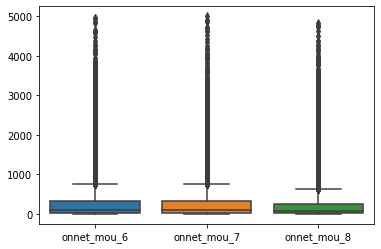

In [64]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['onnet_mou_6','onnet_mou_7', 'onnet_mou_8']])

In [65]:
hvc_df['churn'].value_counts(normalize=True) * 100

0    92.016511
1     7.983489
Name: churn, dtype: float64

In [66]:
hvc_df.shape

(29799, 159)

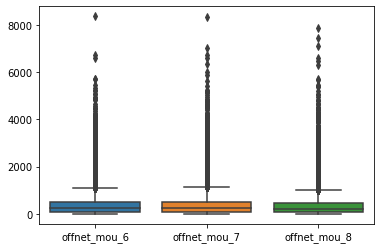

In [67]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['offnet_mou_6','offnet_mou_7', 'offnet_mou_8']])

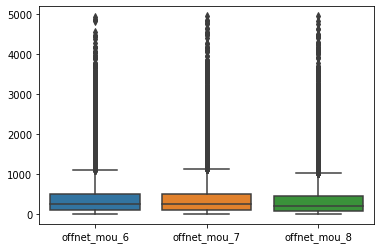

In [68]:
hvc_df[((hvc_df['offnet_mou_6'] > 5000) | (hvc_df['offnet_mou_7'] > 5000) | (hvc_df['offnet_mou_8'] > 5000))]
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['offnet_mou_6'] > 5000) | (hvc_df['offnet_mou_7'] > 5000) | (hvc_df['offnet_mou_8'] > 5000))]
ax = sns.boxplot( data=hvc_df[['offnet_mou_6','offnet_mou_7', 'offnet_mou_8']])

In [69]:
print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

0    92.024993
1     7.975007
Name: churn, dtype: float64
(29768, 159)


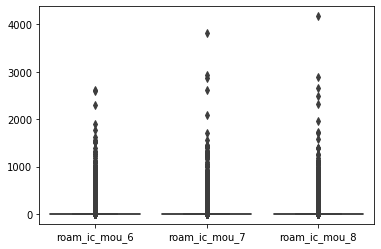

In [70]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['roam_ic_mou_6','roam_ic_mou_7', 'roam_ic_mou_8']])

0    92.027817
1     7.972183
Name: churn, dtype: float64
(29766, 159)


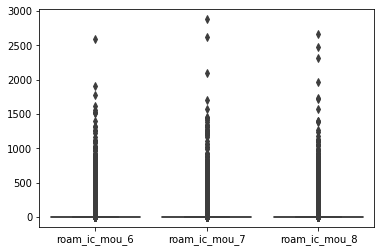

In [71]:
hvc_df[((hvc_df['roam_ic_mou_6'] > 3000) | (hvc_df['roam_ic_mou_7'] > 3000) | (hvc_df['roam_ic_mou_8'] > 3000))]
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['roam_ic_mou_6'] > 3000) | (hvc_df['roam_ic_mou_7'] > 3000) | (hvc_df['roam_ic_mou_8'] > 3000))]
ax = sns.boxplot( data=hvc_df[['roam_ic_mou_6','roam_ic_mou_7', 'roam_ic_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

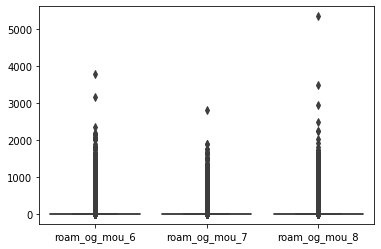

In [72]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['roam_og_mou_6','roam_og_mou_7', 'roam_og_mou_8']])

0    92.036558
1     7.963442
Name: churn, dtype: float64
(29761, 159)


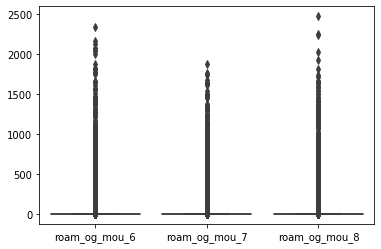

In [73]:
hvc_df[((hvc_df['roam_og_mou_6'] > 2500) | (hvc_df['roam_og_mou_7'] > 2500) | (hvc_df['roam_og_mou_8'] > 2500))]
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['roam_og_mou_6'] > 2500) | (hvc_df['roam_og_mou_7'] > 2500) | (hvc_df['roam_og_mou_8'] > 2500))]
ax = sns.boxplot( data=hvc_df[['roam_og_mou_6','roam_og_mou_7', 'roam_og_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

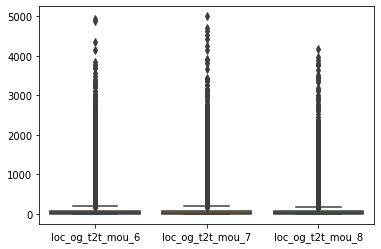

In [74]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7', 'loc_og_t2t_mou_8']])

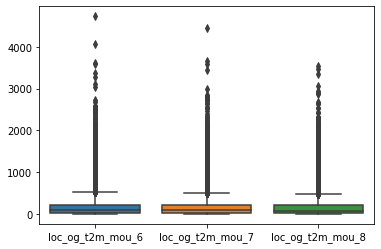

In [75]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8']])

0    92.042628
1     7.957372
Name: churn, dtype: float64
(29746, 159)


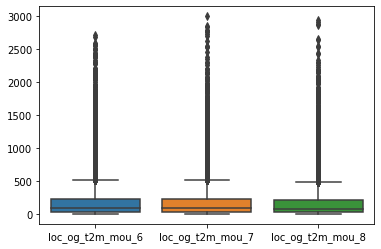

In [76]:
hvc_df[((hvc_df['loc_og_t2m_mou_6'] > 3000) | (hvc_df['loc_og_t2m_mou_7'] > 3000) | (hvc_df['loc_og_t2m_mou_8'] > 3000))]
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['loc_og_t2m_mou_6'] > 3000) | (hvc_df['loc_og_t2m_mou_7'] > 3000) | (hvc_df['loc_og_t2m_mou_8'] > 3000))]
ax = sns.boxplot( data=hvc_df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7', 'loc_og_t2m_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

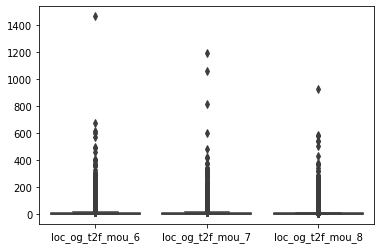

In [77]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8']])

0    92.045187
1     7.954813
Name: churn, dtype: float64
(29743, 159)


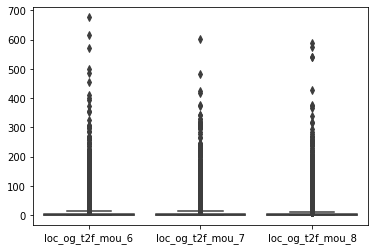

In [78]:
hvc_df[((hvc_df['loc_og_t2f_mou_6'] > 800) | (hvc_df['loc_og_t2f_mou_7'] > 800) | (hvc_df['loc_og_t2f_mou_8'] > 800))]
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['loc_og_t2f_mou_6'] > 800) | (hvc_df['loc_og_t2f_mou_7'] > 800) | (hvc_df['loc_og_t2f_mou_8'] > 800))]
ax = sns.boxplot( data=hvc_df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7', 'loc_og_t2f_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

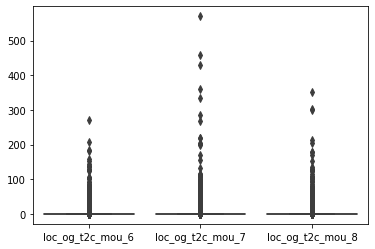

In [79]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8']])

0    92.048703
1     7.951297
Name: churn, dtype: float64
(29731, 159)


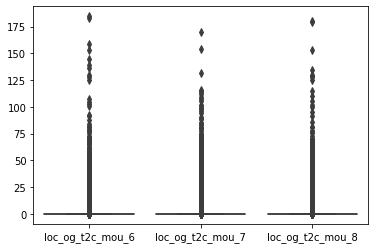

In [80]:
hvc_df[((hvc_df['loc_og_t2c_mou_6'] > 200) | (hvc_df['loc_og_t2c_mou_7'] > 200) | (hvc_df['loc_og_t2c_mou_8'] > 200))]
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['loc_og_t2c_mou_6'] > 200) | (hvc_df['loc_og_t2c_mou_7'] > 200) | (hvc_df['loc_og_t2c_mou_8'] > 200))]
ax = sns.boxplot( data=hvc_df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7', 'loc_og_t2c_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

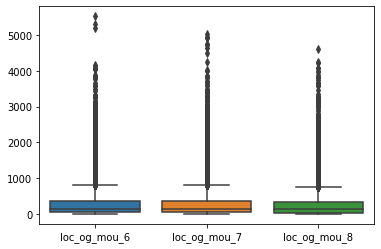

In [81]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8']])

0    92.047633
1     7.952367
Name: churn, dtype: float64
(29727, 159)


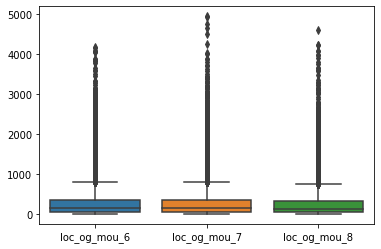

In [82]:
hvc_df[((hvc_df['loc_og_mou_6'] > 5000) | (hvc_df['loc_og_mou_7'] > 5000) | (hvc_df['loc_og_mou_8'] > 5000))]
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['loc_og_mou_6'] > 5000) | (hvc_df['loc_og_mou_7'] > 5000) | (hvc_df['loc_og_mou_8'] > 5000))]
ax = sns.boxplot( data=hvc_df[['loc_og_mou_6','loc_og_mou_7', 'loc_og_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

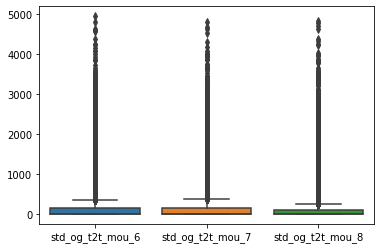

In [83]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8']])

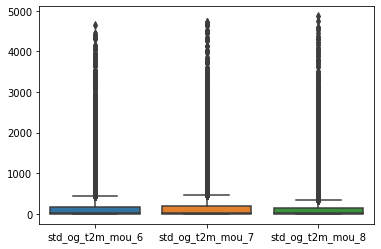

In [84]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8']])

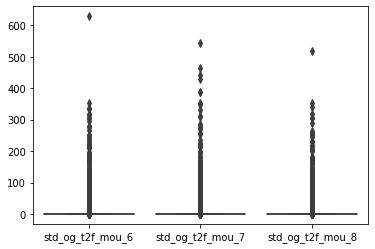

In [85]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8']])

0    92.046296
1     7.953704
Name: churn, dtype: float64
(29722, 159)


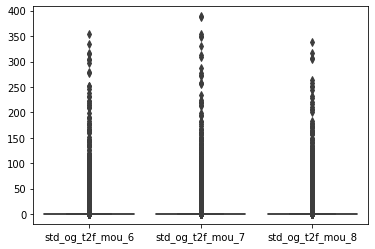

In [86]:
hvc_df[((hvc_df['std_og_t2f_mou_6'] > 400) | (hvc_df['std_og_t2f_mou_7'] > 400) | (hvc_df['std_og_t2f_mou_8'] > 400))]
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['std_og_t2f_mou_6'] > 400) | (hvc_df['std_og_t2f_mou_7'] > 400) | (hvc_df['std_og_t2f_mou_8'] > 400))]
ax = sns.boxplot( data=hvc_df[['std_og_t2f_mou_6','std_og_t2f_mou_7', 'std_og_t2f_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

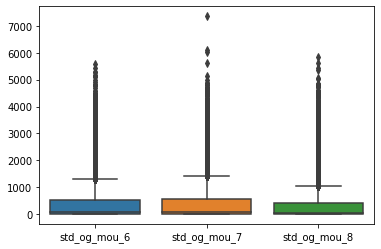

In [87]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8']])

0    92.055477
1     7.944523
Name: churn, dtype: float64
(29706, 159)


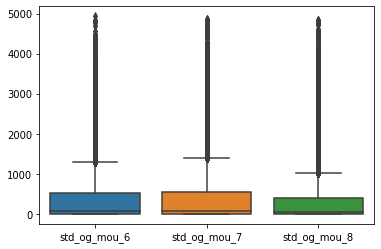

In [88]:
hvc_df[((hvc_df['std_og_mou_6'] > 5000) | (hvc_df['std_og_mou_7'] > 5000) | (hvc_df['std_og_mou_8'] > 5000))]
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['std_og_mou_6'] > 5000) | (hvc_df['std_og_mou_7'] > 5000) | (hvc_df['std_og_mou_8'] > 5000))]
ax = sns.boxplot( data=hvc_df[['std_og_mou_6','std_og_mou_7', 'std_og_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

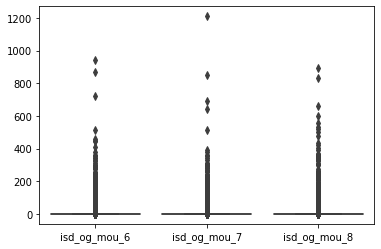

In [89]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8']])

0    92.06237
1     7.93763
Name: churn, dtype: float64
(29694, 159)


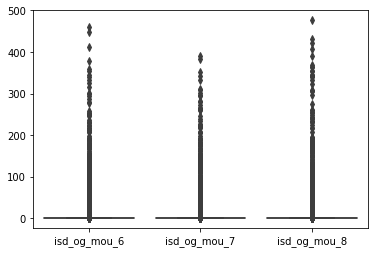

In [90]:
hvc_df[((hvc_df['isd_og_mou_6'] > 500) | (hvc_df['isd_og_mou_7'] > 500) | (hvc_df['isd_og_mou_8'] > 500))]
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['isd_og_mou_6'] > 500) | (hvc_df['isd_og_mou_7'] > 500) | (hvc_df['isd_og_mou_8'] > 500))]
ax = sns.boxplot( data=hvc_df[['isd_og_mou_6','isd_og_mou_7', 'isd_og_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

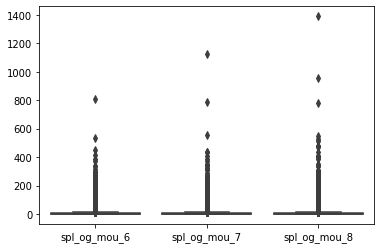

In [91]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8']])

0    92.059695
1     7.940305
Name: churn, dtype: float64
(29684, 159)


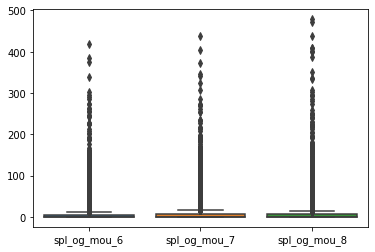

In [92]:
hvc_df[((hvc_df['spl_og_mou_6'] > 500) | (hvc_df['spl_og_mou_7'] > 500) | (hvc_df['spl_og_mou_8'] > 500))]
# Remove these high ARPU customers 
hvc_df = hvc_df[~((hvc_df['spl_og_mou_6'] > 500) | (hvc_df['spl_og_mou_7'] > 500) | (hvc_df['spl_og_mou_8'] > 500))]
ax = sns.boxplot( data=hvc_df[['spl_og_mou_6','spl_og_mou_7', 'spl_og_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

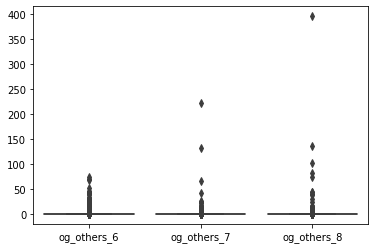

In [93]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['og_others_6', 'og_others_7', 'og_others_8']])

0    92.056752
1     7.943248
Name: churn, dtype: float64
(29673, 159)


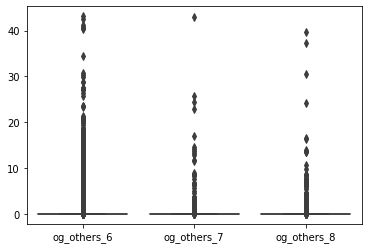

In [94]:
hvc_df[((hvc_df['og_others_6'] > 50) | (hvc_df['og_others_7'] > 50) | (hvc_df['og_others_8'] > 50))]

hvc_df = hvc_df[~((hvc_df['og_others_6'] > 50) | (hvc_df['og_others_7'] > 50) | (hvc_df['og_others_8'] > 50))]
ax = sns.boxplot( data=hvc_df[['og_others_6','og_others_7', 'og_others_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

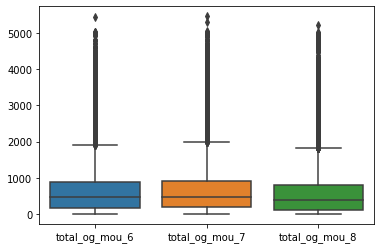

In [95]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']])

0    92.054342
1     7.945658
Name: churn, dtype: float64
(29664, 159)


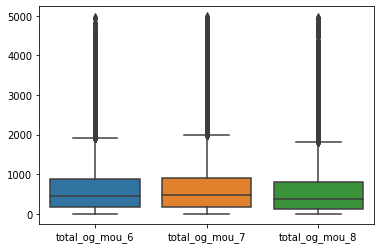

In [96]:
hvc_df[((hvc_df['total_og_mou_6'] > 5000) | (hvc_df['total_og_mou_7'] > 5000) | (hvc_df['total_og_mou_8'] > 5000))]

hvc_df = hvc_df[~((hvc_df['total_og_mou_6'] > 5000) | (hvc_df['total_og_mou_7'] > 5000) | (hvc_df['total_og_mou_8'] > 5000))]
ax = sns.boxplot( data=hvc_df[['total_og_mou_6','total_og_mou_7', 'total_og_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

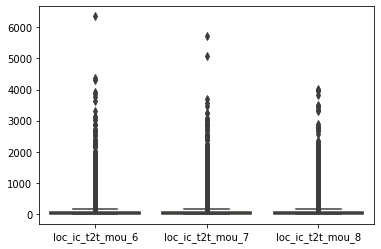

In [97]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8']])

0    92.051818
1     7.948182
Name: churn, dtype: float64
(29642, 159)


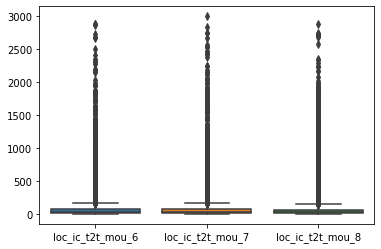

In [98]:
hvc_df[((hvc_df['loc_ic_t2t_mou_6'] > 3000) | (hvc_df['loc_ic_t2t_mou_7'] > 3000) | (hvc_df['loc_ic_t2t_mou_8'] > 3000))]

hvc_df = hvc_df[~((hvc_df['loc_ic_t2t_mou_6'] > 3000) | (hvc_df['loc_ic_t2t_mou_7'] > 3000) | (hvc_df['loc_ic_t2t_mou_8'] > 3000))]
ax = sns.boxplot( data=hvc_df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

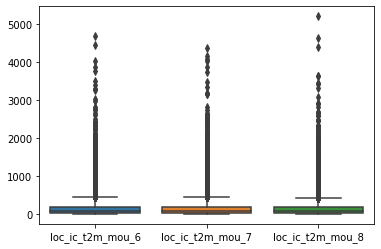

In [99]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8']])

0    92.045646
1     7.954354
Name: churn, dtype: float64
(29619, 159)


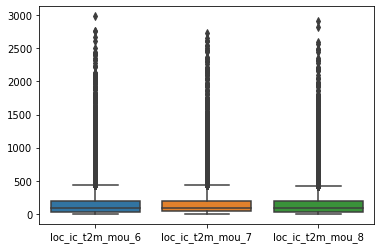

In [100]:
hvc_df[((hvc_df['loc_ic_t2m_mou_6'] > 3000) | (hvc_df['loc_ic_t2m_mou_7'] > 3000) | (hvc_df['loc_ic_t2m_mou_8'] > 3000))]

hvc_df = hvc_df[~((hvc_df['loc_ic_t2m_mou_6'] > 3000) | (hvc_df['loc_ic_t2m_mou_7'] > 3000) | (hvc_df['loc_ic_t2m_mou_8'] > 3000))]
ax = sns.boxplot( data=hvc_df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

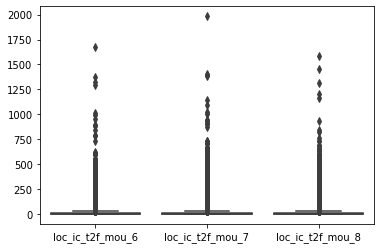

In [101]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']])

0    92.034529
1     7.965471
Name: churn, dtype: float64
(29540, 159)


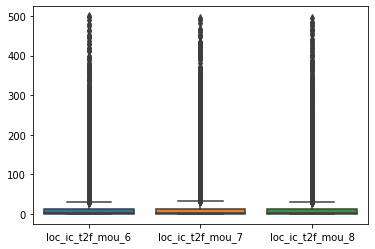

In [102]:
hvc_df[((hvc_df['loc_ic_t2f_mou_6'] > 500) | (hvc_df['loc_ic_t2f_mou_7'] > 500) | (hvc_df['loc_ic_t2f_mou_8'] > 500))]

hvc_df = hvc_df[~((hvc_df['loc_ic_t2f_mou_6'] > 500) | (hvc_df['loc_ic_t2f_mou_7'] > 500) | (hvc_df['loc_ic_t2f_mou_8'] > 500))]
ax = sns.boxplot( data=hvc_df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

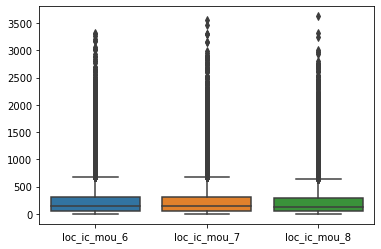

In [103]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']])

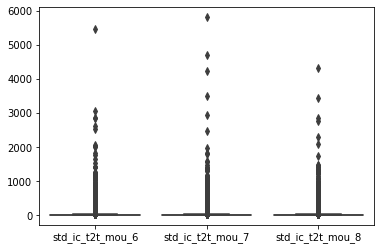

In [104]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8']])

0    92.037796
1     7.962204
Name: churn, dtype: float64
(29527, 159)


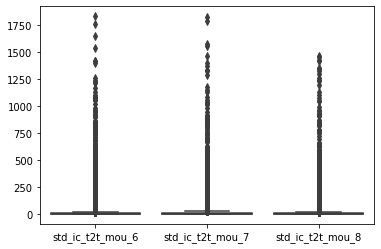

In [105]:
hvc_df[((hvc_df['std_ic_t2t_mou_6'] > 2000) | (hvc_df['std_ic_t2t_mou_7'] > 2000) | (hvc_df['std_ic_t2t_mou_8'] > 2000))]

hvc_df = hvc_df[~((hvc_df['std_ic_t2t_mou_6'] > 2000) | (hvc_df['std_ic_t2t_mou_7'] > 2000) | (hvc_df['std_ic_t2t_mou_8'] > 2000))]
ax = sns.boxplot( data=hvc_df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7', 'std_ic_t2t_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

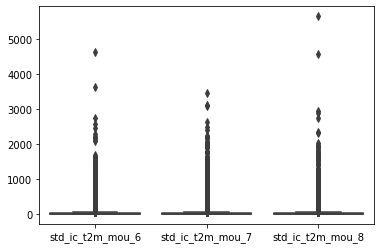

In [106]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8']])

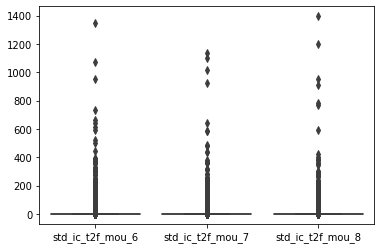

In [107]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8']])

0    92.032399
1     7.967601
Name: churn, dtype: float64
(29507, 159)


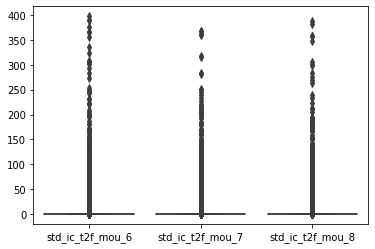

In [108]:
hvc_df[((hvc_df['std_ic_t2f_mou_6'] > 400) | (hvc_df['std_ic_t2f_mou_7'] > 400) | (hvc_df['std_ic_t2f_mou_8'] > 400))]

hvc_df = hvc_df[~((hvc_df['std_ic_t2f_mou_6'] > 400) | (hvc_df['std_ic_t2f_mou_7'] > 400) | (hvc_df['std_ic_t2f_mou_8'] > 400))]
ax = sns.boxplot( data=hvc_df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7', 'std_ic_t2f_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

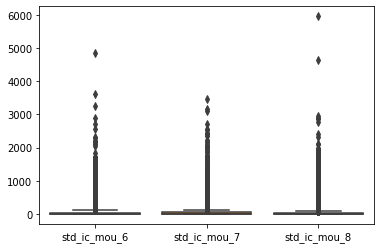

In [109]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8']])

0    92.033927
1     7.966073
Name: churn, dtype: float64
(29475, 159)


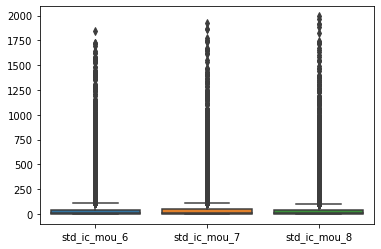

In [110]:
hvc_df[((hvc_df['std_ic_mou_6'] > 2000) | (hvc_df['std_ic_mou_7'] > 2000) | (hvc_df['std_ic_mou_8'] > 2000))]

hvc_df = hvc_df[~((hvc_df['std_ic_mou_6'] > 2000) | (hvc_df['std_ic_mou_7'] > 2000) | (hvc_df['std_ic_mou_8'] > 2000))]
ax = sns.boxplot( data=hvc_df[['std_ic_mou_6','std_ic_mou_7', 'std_ic_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

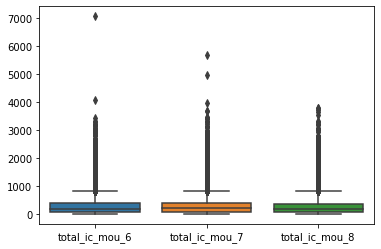

In [111]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']])

0    92.030438
1     7.969562
Name: churn, dtype: float64
(29437, 159)


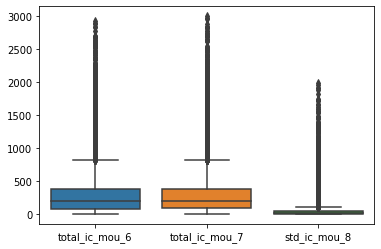

In [112]:
hvc_df[((hvc_df['total_ic_mou_6'] > 3000) | (hvc_df['total_ic_mou_7'] > 3000) | (hvc_df['total_ic_mou_8'] > 3000))]

hvc_df = hvc_df[~((hvc_df['total_ic_mou_6'] > 3000) | (hvc_df['total_ic_mou_7'] > 3000) | (hvc_df['total_ic_mou_8'] > 3000))]
ax = sns.boxplot( data=hvc_df[['total_ic_mou_6','total_ic_mou_7', 'std_ic_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

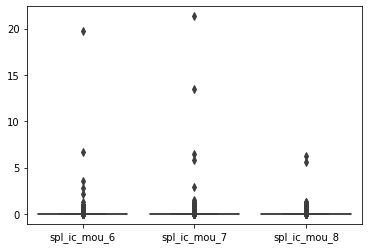

In [113]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8']])

0    92.030193
1     7.969807
Name: churn, dtype: float64
(29411, 159)


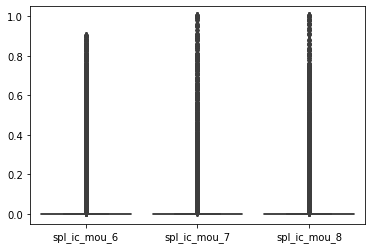

In [114]:
hvc_df[((hvc_df['spl_ic_mou_6'] > 1) | (hvc_df['spl_ic_mou_7'] > 1) | (hvc_df['spl_ic_mou_8'] > 1))]

hvc_df = hvc_df[~((hvc_df['spl_ic_mou_6'] > 1) | (hvc_df['spl_ic_mou_7'] > 1) | (hvc_df['spl_ic_mou_8'] > 1))]
ax = sns.boxplot( data=hvc_df[['spl_ic_mou_6','spl_ic_mou_7', 'spl_ic_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

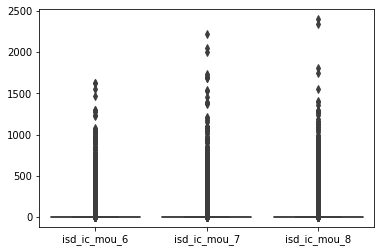

In [115]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8']])

0    92.027211
1     7.972789
Name: churn, dtype: float64
(29400, 159)


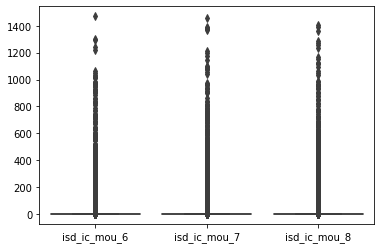

In [116]:
hvc_df[((hvc_df['isd_ic_mou_6'] > 1500) | (hvc_df['isd_ic_mou_7'] > 1500) | (hvc_df['isd_ic_mou_8'] > 1500))]

hvc_df = hvc_df[~((hvc_df['isd_ic_mou_6'] > 1500) | (hvc_df['isd_ic_mou_7'] > 1500) | (hvc_df['isd_ic_mou_8'] > 1500))]
ax = sns.boxplot( data=hvc_df[['isd_ic_mou_6','isd_ic_mou_7', 'isd_ic_mou_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

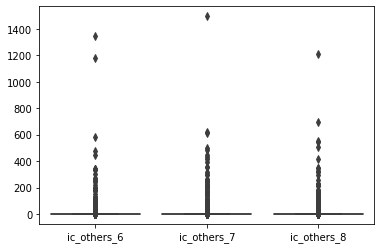

In [117]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['ic_others_6', 'ic_others_7', 'ic_others_8']])

0    92.02124
1     7.97876
Name: churn, dtype: float64
(29378, 159)


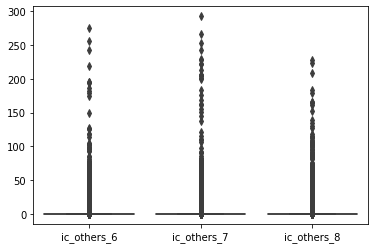

In [118]:
hvc_df[((hvc_df['ic_others_6'] > 300) | (hvc_df['ic_others_7'] > 300) | (hvc_df['ic_others_8'] > 300))]

hvc_df = hvc_df[~((hvc_df['ic_others_6'] > 300) | (hvc_df['ic_others_7'] > 300) | (hvc_df['ic_others_8'] > 300))]
ax = sns.boxplot( data=hvc_df[['ic_others_6','ic_others_7', 'ic_others_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

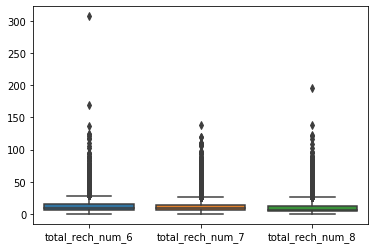

In [119]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']])

0    92.032836
1     7.967164
Name: churn, dtype: float64
(29358, 159)


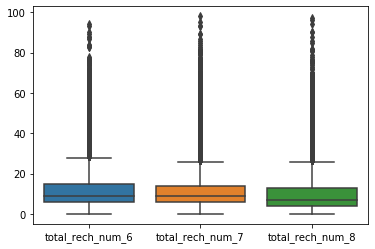

In [120]:
hvc_df[((hvc_df['total_rech_num_6'] > 100) | (hvc_df['total_rech_num_7'] > 100) | (hvc_df['total_rech_num_8'] > 100))]

hvc_df = hvc_df[~((hvc_df['total_rech_num_6'] > 100) | (hvc_df['total_rech_num_7'] > 100) | (hvc_df['total_rech_num_8'] > 100))]
ax = sns.boxplot( data=hvc_df[['total_rech_num_6','total_rech_num_7', 'total_rech_num_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

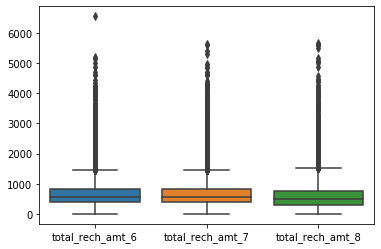

In [121]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']])

0    92.032714
1     7.967286
Name: churn, dtype: float64
(29345, 159)


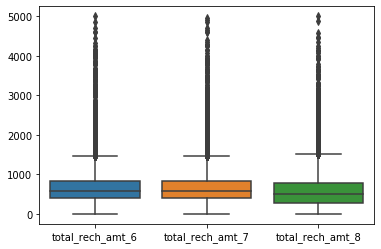

In [122]:
hvc_df[((hvc_df['total_rech_amt_6'] > 5000) | (hvc_df['total_rech_amt_7'] > 5000) | (hvc_df['total_rech_amt_8'] > 5000))]

hvc_df = hvc_df[~((hvc_df['total_rech_amt_6'] > 5000) | (hvc_df['total_rech_amt_7'] > 5000) | (hvc_df['total_rech_amt_8'] > 5000))]
ax = sns.boxplot( data=hvc_df[['total_rech_amt_6','total_rech_amt_7', 'total_rech_amt_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

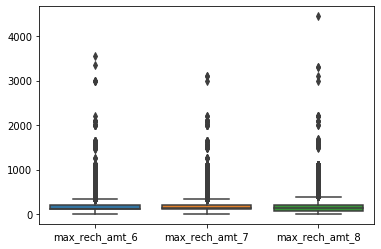

In [123]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']])

0    92.09429
1     7.90571
Name: churn, dtype: float64
(29017, 159)


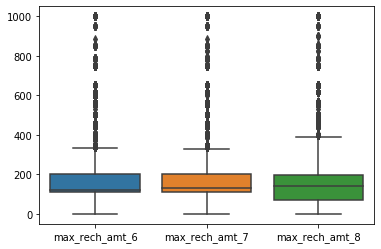

In [124]:
hvc_df[((hvc_df['max_rech_amt_6'] > 1000) | (hvc_df['max_rech_amt_7'] > 1000) | (hvc_df['max_rech_amt_8'] > 1000))]

hvc_df = hvc_df[~((hvc_df['max_rech_amt_6'] > 1000) | (hvc_df['max_rech_amt_7'] > 1000) | (hvc_df['max_rech_amt_8'] > 1000))]
ax = sns.boxplot( data=hvc_df[['max_rech_amt_6','max_rech_amt_7', 'max_rech_amt_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

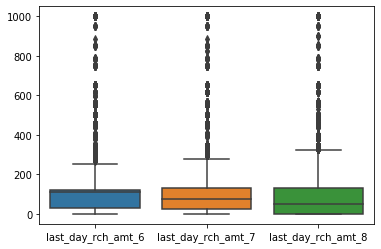

In [125]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']])

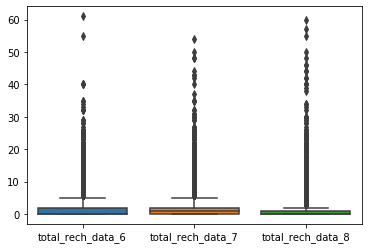

In [126]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']])

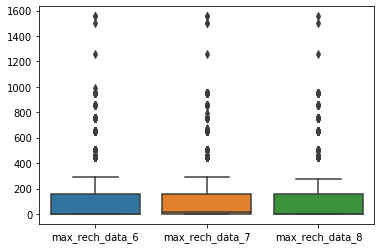

In [127]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']])

0    92.160062
1     7.839938
Name: churn, dtype: float64
(28189, 159)


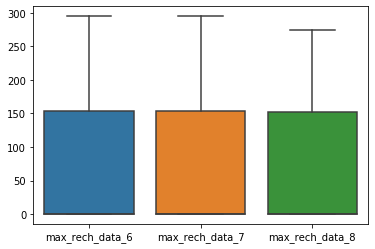

In [128]:
hvc_df[((hvc_df['max_rech_data_6'] > 400) | (hvc_df['max_rech_data_7'] > 400) | (hvc_df['max_rech_data_8'] > 400))]

hvc_df = hvc_df[~((hvc_df['max_rech_data_6'] > 400) | (hvc_df['max_rech_data_7'] > 400) | (hvc_df['max_rech_data_8'] > 400))]
ax = sns.boxplot( data=hvc_df[['max_rech_data_6','max_rech_data_7', 'max_rech_data_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

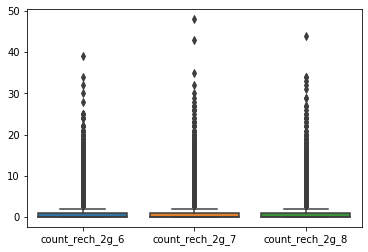

In [129]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8']])

0    92.160551
1     7.839449
Name: churn, dtype: float64
(28178, 159)


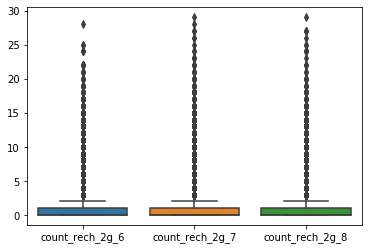

In [130]:
hvc_df[((hvc_df['count_rech_2g_6'] > 30) | (hvc_df['count_rech_2g_7'] > 30) | (hvc_df['count_rech_2g_8'] > 30))]

hvc_df = hvc_df[~((hvc_df['count_rech_2g_6'] > 30) | (hvc_df['count_rech_2g_7'] > 30) | (hvc_df['count_rech_2g_8'] > 30))]
ax = sns.boxplot( data=hvc_df[['count_rech_2g_6','count_rech_2g_7', 'count_rech_2g_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

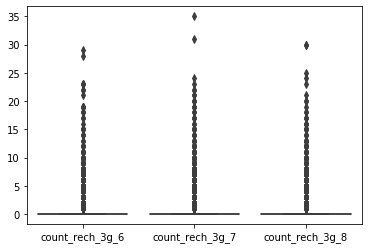

In [131]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']])

0    92.162709
1     7.837291
Name: churn, dtype: float64
(28173, 159)


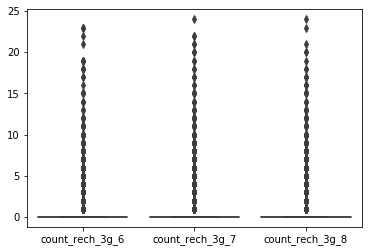

In [132]:
hvc_df[((hvc_df['count_rech_3g_6'] > 25) | (hvc_df['count_rech_3g_7'] > 25) | (hvc_df['count_rech_3g_8'] > 25))]

hvc_df = hvc_df[~((hvc_df['count_rech_3g_6'] > 25) | (hvc_df['count_rech_3g_7'] > 25) | (hvc_df['count_rech_3g_8'] > 25))]
ax = sns.boxplot( data=hvc_df[['count_rech_3g_6','count_rech_3g_7', 'count_rech_3g_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

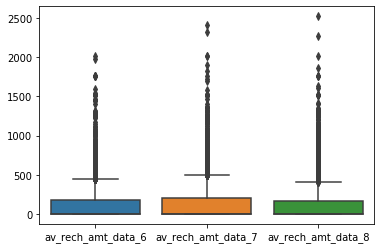

In [133]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']])

0    92.151845
1     7.848155
Name: churn, dtype: float64
(28134, 159)


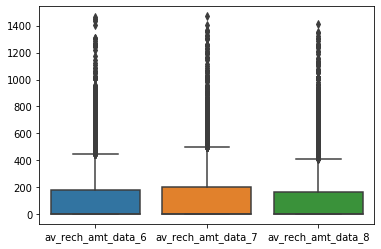

In [134]:
hvc_df[((hvc_df['av_rech_amt_data_6'] > 1500) | (hvc_df['av_rech_amt_data_7'] > 1500) | (hvc_df['av_rech_amt_data_8'] > 1500))]

hvc_df = hvc_df[~((hvc_df['av_rech_amt_data_6'] > 1500) | (hvc_df['av_rech_amt_data_7'] > 1500) | (hvc_df['av_rech_amt_data_8'] > 1500))]
ax = sns.boxplot( data=hvc_df[['av_rech_amt_data_6','av_rech_amt_data_7', 'av_rech_amt_data_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

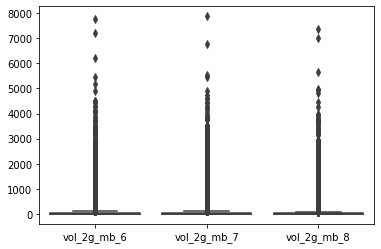

In [135]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']])

0    92.151142
1     7.848858
Name: churn, dtype: float64
(28106, 159)


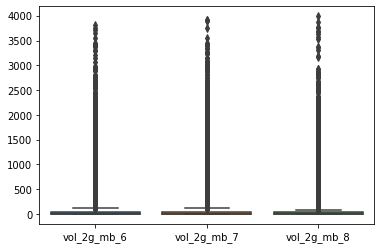

In [136]:
hvc_df[((hvc_df['vol_2g_mb_6'] > 4000) | (hvc_df['vol_2g_mb_7'] > 4000) | (hvc_df['vol_2g_mb_8'] > 4000))]

hvc_df = hvc_df[~((hvc_df['vol_2g_mb_6'] > 4000) | (hvc_df['vol_2g_mb_7'] > 4000) | (hvc_df['vol_2g_mb_8'] > 4000))]
ax = sns.boxplot( data=hvc_df[['vol_2g_mb_6','vol_2g_mb_7', 'vol_2g_mb_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

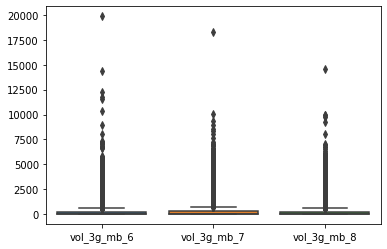

In [137]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']])

0    92.153923
1     7.846077
Name: churn, dtype: float64
(28014, 159)


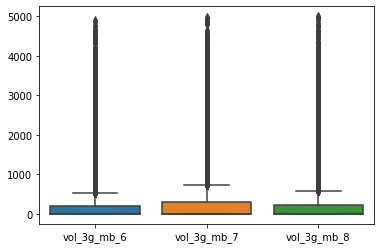

In [138]:
hvc_df[((hvc_df['vol_3g_mb_6'] > 5000) | (hvc_df['vol_3g_mb_7'] > 5000) | (hvc_df['vol_3g_mb_8'] > 5000))]

hvc_df = hvc_df[~((hvc_df['vol_3g_mb_6'] > 5000) | (hvc_df['vol_3g_mb_7'] > 5000) | (hvc_df['vol_3g_mb_8'] > 5000))]
ax = sns.boxplot( data=hvc_df[['vol_3g_mb_6','vol_3g_mb_7', 'vol_3g_mb_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

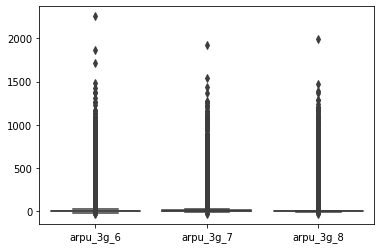

In [139]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8']])

0    92.160086
1     7.839914
Name: churn, dtype: float64
(27985, 159)


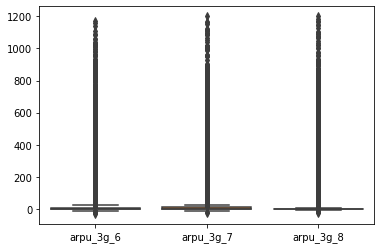

In [140]:
hvc_df[((hvc_df['arpu_3g_6'] > 1200) | (hvc_df['arpu_3g_7'] > 1200) | (hvc_df['arpu_3g_8'] > 1200))]

hvc_df = hvc_df[~((hvc_df['arpu_3g_6'] > 1200) | (hvc_df['arpu_3g_7'] > 1200) | (hvc_df['arpu_3g_8'] > 1200))]
ax = sns.boxplot( data=hvc_df[['arpu_3g_6','arpu_3g_7', 'arpu_3g_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

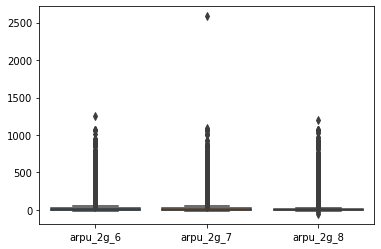

In [141]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']])

0    92.16107
1     7.83893
Name: churn, dtype: float64
(27963, 159)


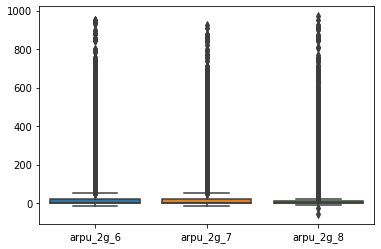

In [142]:
hvc_df[((hvc_df['arpu_2g_6'] > 1000) | (hvc_df['arpu_2g_7'] > 1000) | (hvc_df['arpu_2g_8'] > 1000))]

hvc_df = hvc_df[~((hvc_df['arpu_2g_6'] > 1000) | (hvc_df['arpu_2g_7'] > 1000) | (hvc_df['arpu_2g_8'] > 1000))]
ax = sns.boxplot( data=hvc_df[['arpu_2g_6','arpu_2g_7', 'arpu_2g_8']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

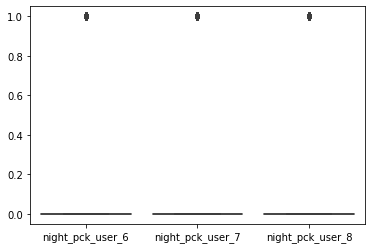

In [143]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']])

# Mark it as Categorical variable

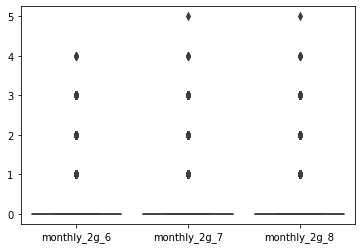

In [144]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']])

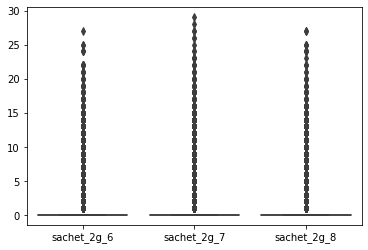

In [145]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']])

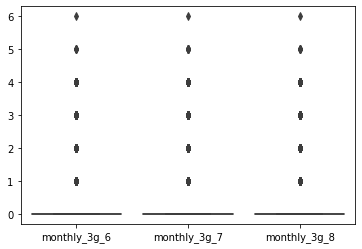

In [146]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']])

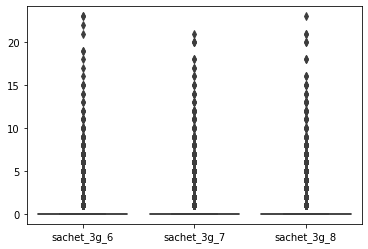

In [147]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']])

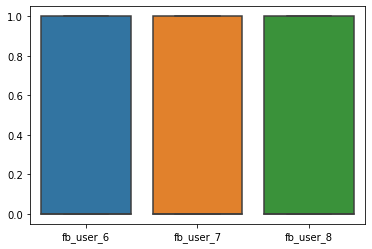

In [148]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['fb_user_6', 'fb_user_7', 'fb_user_8']])

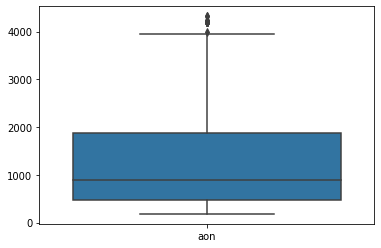

In [149]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['aon']])

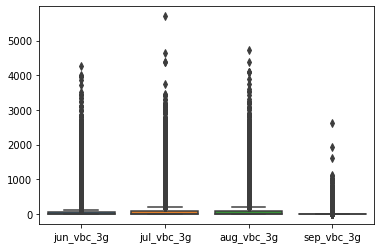

In [150]:
# outliers treatment 
ax = sns.boxplot( data=hvc_df[['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g','sep_vbc_3g']])

0    92.14024
1     7.85976
Name: churn, dtype: float64
(27838, 159)


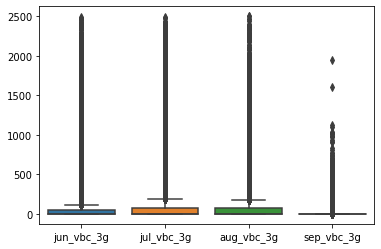

In [151]:
hvc_df[((hvc_df['jun_vbc_3g'] > 2500) | (hvc_df['jul_vbc_3g'] > 2500) | (hvc_df['aug_vbc_3g'] > 2500) | (hvc_df['sep_vbc_3g'] > 2500))]

hvc_df = hvc_df[~((hvc_df['jun_vbc_3g'] > 2500) | (hvc_df['jul_vbc_3g'] > 2500) | (hvc_df['aug_vbc_3g'] > 2500) | (hvc_df['sep_vbc_3g'] > 2500))]
ax = sns.boxplot( data=hvc_df[['jun_vbc_3g','jul_vbc_3g', 'aug_vbc_3g', 'sep_vbc_3g']])

print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

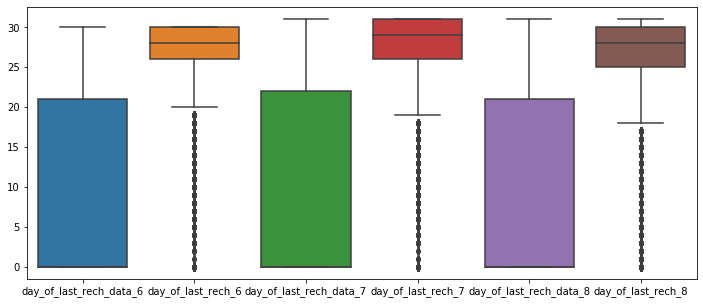

In [152]:
# outliers treatment 
plt.figure(figsize = (12,5)) 
ax = sns.boxplot( data=hvc_df[['day_of_last_rech_data_6', 'day_of_last_rech_6', 'day_of_last_rech_data_7', 'day_of_last_rech_7','day_of_last_rech_data_8','day_of_last_rech_8']])

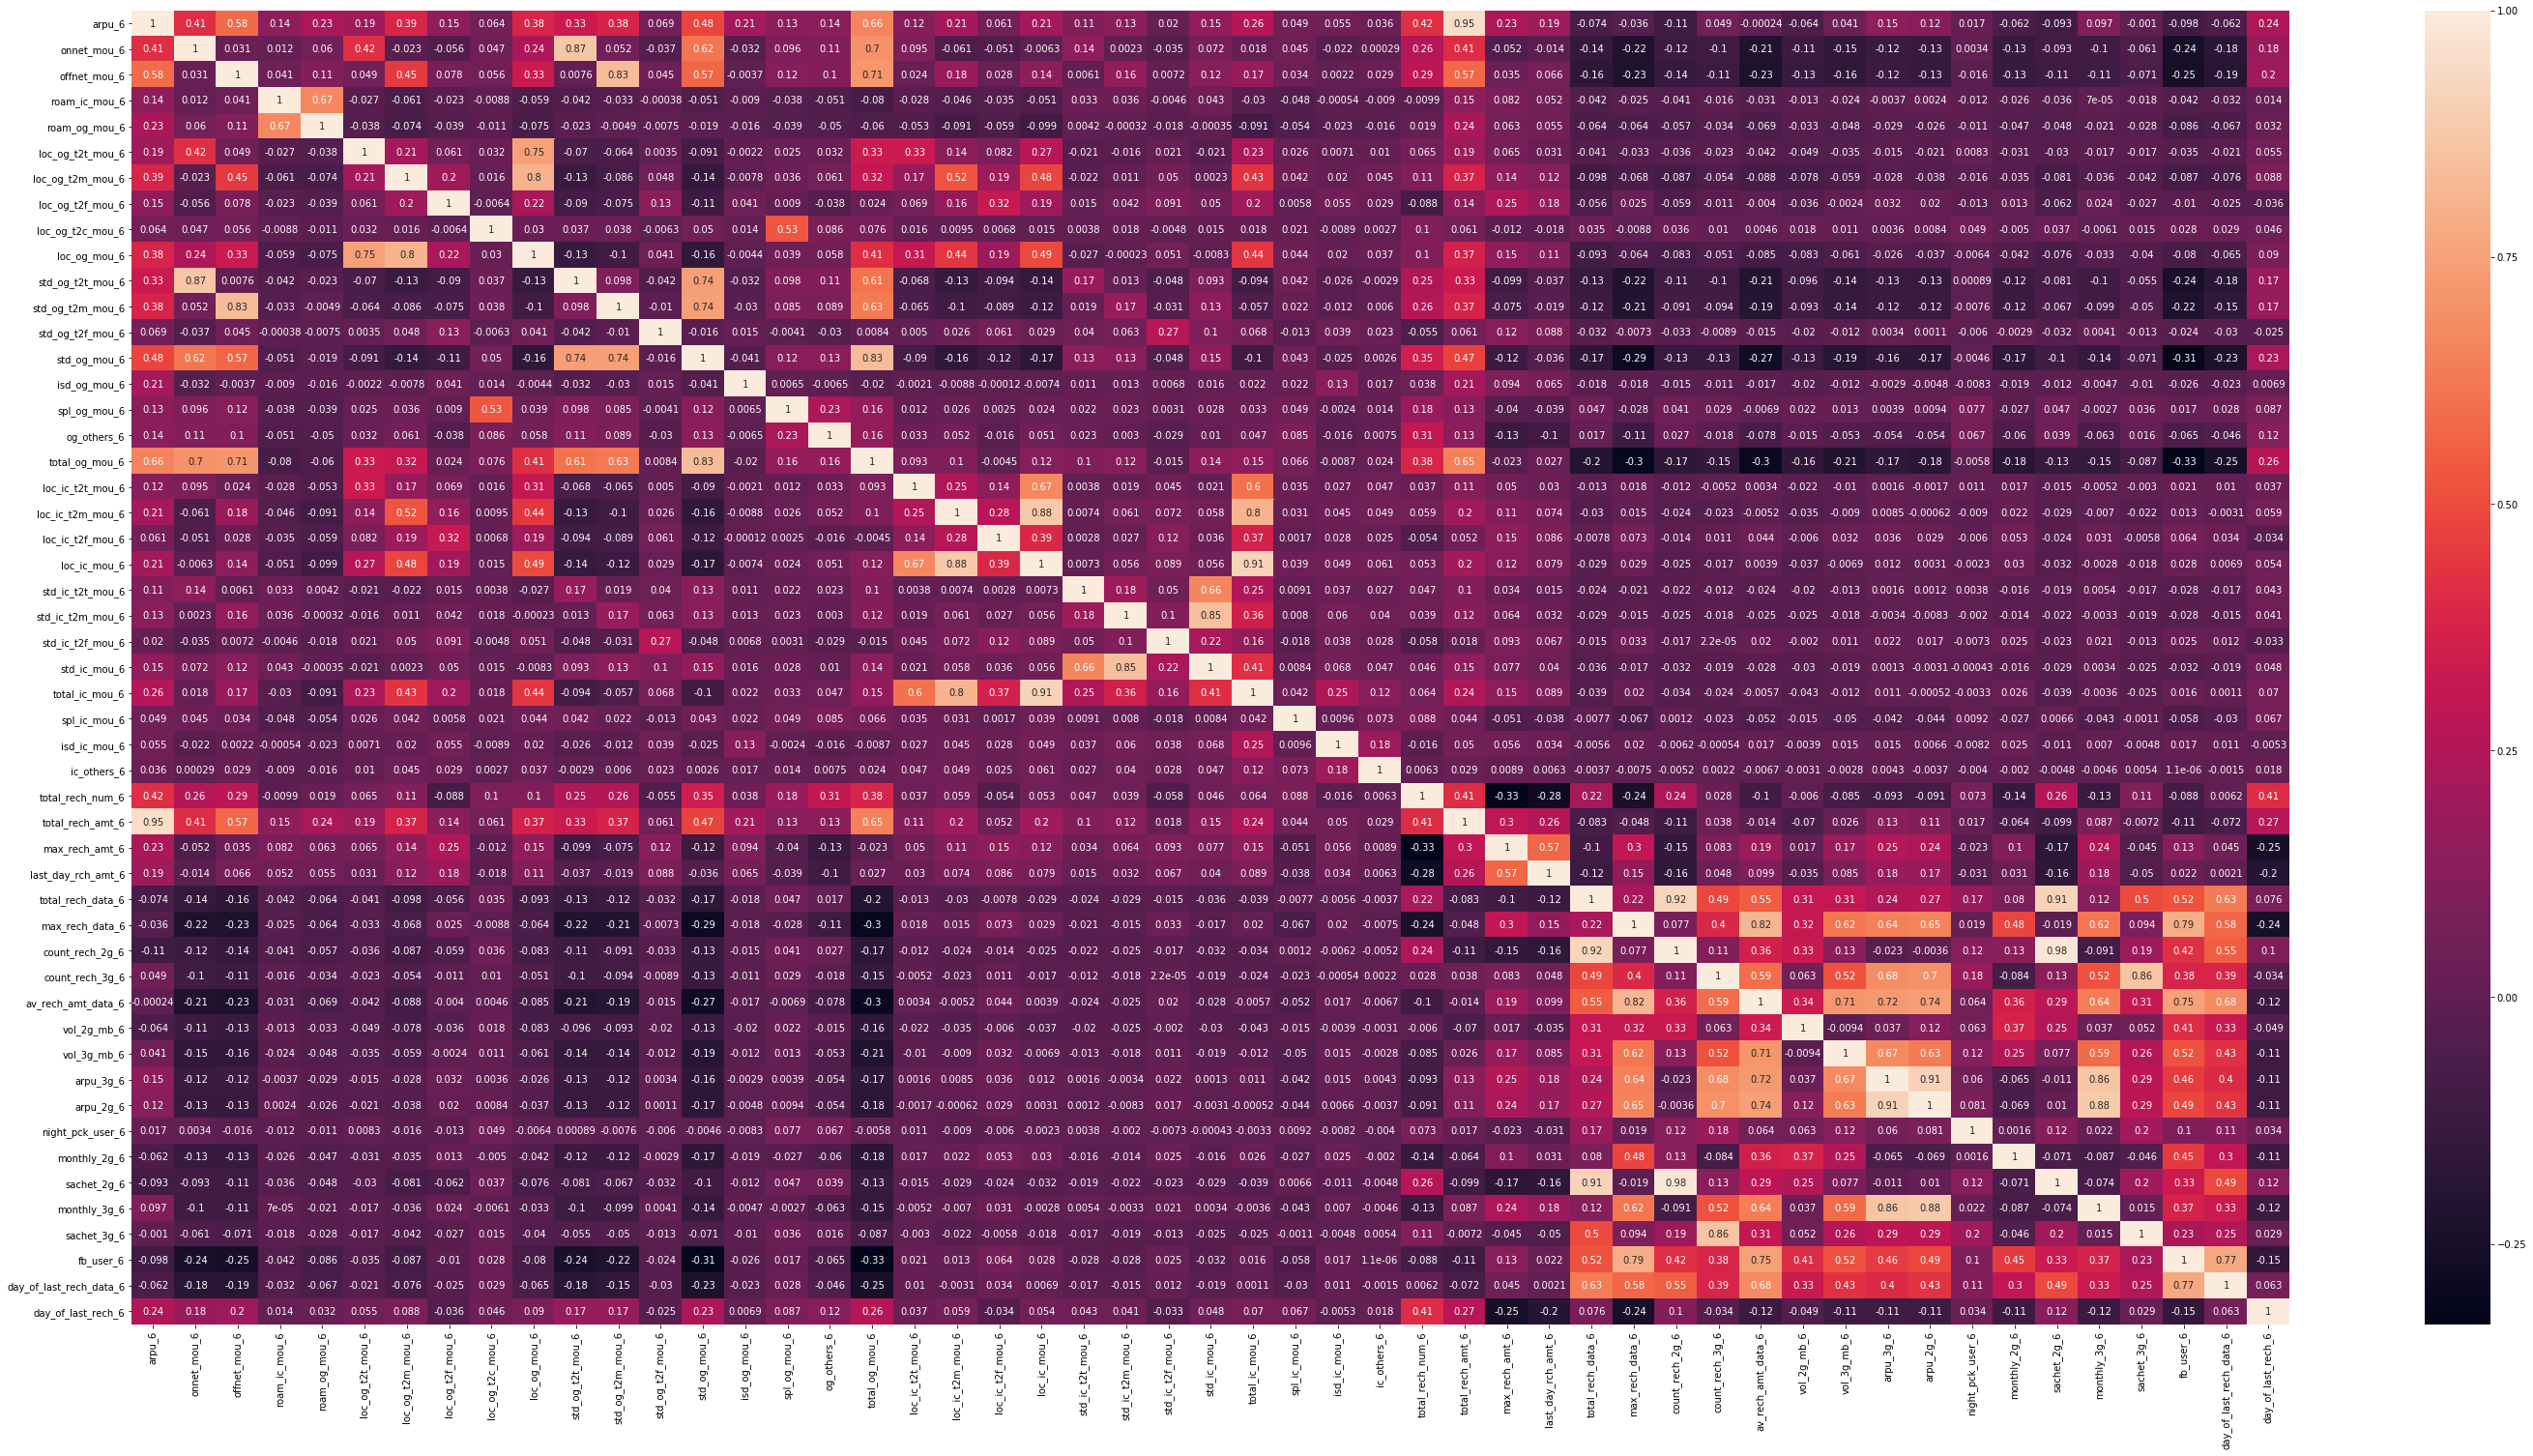

In [153]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,25))     # Size of the figure
sns.heatmap(hvc_df[[f for f in hvc_df.columns if f.endswith("_6")]].corr(),annot = True)

### Step 5: Modeling with PCA 

In [154]:
print(hvc_df['churn'].value_counts(normalize=True) * 100)
print(hvc_df.shape)

0    92.14024
1     7.85976
Name: churn, dtype: float64
(27838, 159)


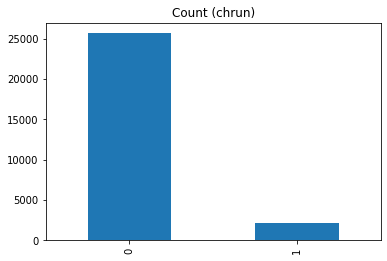

In [155]:
# Count classes and plot
hvc_df_count = hvc_df.iloc[:,-1].value_counts()
hvc_df_count.plot(kind='bar', title='Count (chrun)');

#### It is clearly imbalance data, we need to apply some techniques to handle imbance data

#### Applying Ramdom sampling technique

In [156]:
# Class count
churn_0_count, churn_1_count=hvc_df.iloc[:,-1].value_counts()
print('churn_1_count', churn_1_count)
print('churn_0_count', churn_0_count)

churn_1_count 2188
churn_0_count 25650


In [0]:
# Seperate classes
chrun_0 = hvc_df[hvc_df.iloc[:,-1] == 0]
churn_1 = hvc_df[hvc_df.iloc[:,-1] == 1]

In [158]:
chrun_0.shape

(25650, 159)

In [159]:
churn_1.shape

(2188, 159)

Random over-sampling:
1    25650
0    25650
Name: churn, dtype: int64


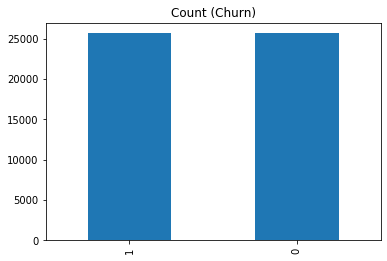

In [160]:
# Resample churn_1 to match chrun_0 count
churn_1_oversample = churn_1.sample(churn_0_count, replace=True)

# Merge back to single df
test_oversample = pd.concat([churn_1_oversample, chrun_0], 
                             axis=0)
# Show counts and plot
print('Random over-sampling:')
print(test_oversample.iloc[:,-1].value_counts())
test_oversample.iloc[:,-1].value_counts().plot(kind='bar', title='Count (Churn)');

In [0]:
# Putting response variable to y
y = test_oversample['churn']

# Putting feature variable to X
X = test_oversample.drop(['churn'], axis=1)

In [162]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)

(35910, 158)
(15390, 158)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
X_scaler = scaler.fit(X_train)
y_scaler = scaler.fit(y_train.values.reshape(-1,1))

# Apply transform to both the training set and the test set.
Xtrain=X_scaler.transform(X_train) 
ytrain=y_scaler.transform(y_train.values.reshape(-1,1)) 

Xtest=X_scaler.transform(X_test) 
ytest=y_scaler.transform(y_test.values.reshape(-1,1))

In [164]:
print("Xtrain.shape:", Xtrain.shape)
print("ytrain.shape:", ytrain.shape)
print("Xtest.shape:", Xtest.shape)
print("ytest.shape:", ytest.shape)

Xtrain.shape: (35910, 158)
ytrain.shape: (35910, 1)
Xtest.shape: (15390, 158)
ytest.shape: (15390, 1)


In [0]:
#Importing the PCA module
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(random_state=100)

In [166]:
#Doing the PCA on the train data
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.n_components

In [168]:
pca.components_

array([[ 1.04537402e-01,  1.21642526e-01,  7.89814934e-02, ...,
         7.16909824e-04, -1.13256737e-03,  7.69158725e-04],
       [-2.35751759e-02,  1.31275048e-01,  2.29646749e-01, ...,
         1.35074036e-03,  2.32096625e-03,  1.71839420e-03],
       [-1.40063155e-01,  2.69112544e-03,  5.90906522e-02, ...,
         8.89169751e-04,  7.73816933e-04,  1.04724326e-03],
       ...,
       [ 0.00000000e+00, -1.65271597e-18,  6.75657139e-19, ...,
         3.39067280e-17, -2.81247138e-17, -2.18943423e-18],
       [-0.00000000e+00,  2.85940251e-19, -1.87969627e-18, ...,
         5.76947038e-17, -3.88177771e-17,  3.58269634e-17],
       [ 0.00000000e+00, -1.11107460e-17, -1.01802895e-17, ...,
         4.82432490e-16, -1.80613914e-16, -5.63219393e-16]])

In [169]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [29.4 12.9  9.5  9.   6.9  6.   4.2  2.7  2.3  1.8  1.7  1.6  1.1  1.1
  1.   0.8  0.8  0.7  0.6  0.5  0.5  0.4  0.4  0.4  0.3  0.3  0.3  0.2
  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0. ]


In [170]:
print (pca.explained_variance_ratio_.cumsum())

[0.29413227 0.42353734 0.51888747 0.60867851 0.67733455 0.73705429
 0.77885606 0.80599671 0.82894557 0.84708878 0.86444015 0.88021158
 0.89141795 0.90198926 0.91203677 0.92014253 0.92788811 0.93531934
 0.94129673 0.94666267 0.95123307 0.95569626 0.95959621 0.96328905
 0.96636352 0.96901981 0.97158172 0.97371507 0.97582504 0.97789267
 0.97968473 0.98122419 0.9826744  0.98396805 0.98512373 0.98608528
 0.98695086 0.9877868  0.98859909 0.989345   0.9900771  0.99078003
 0.99146959 0.9921361  0.99273989 0.99331851 0.99386561 0.99439775
 0.99486234 0.99529567 0.9956726  0.99601791 0.99635304 0.99667241
 0.99696853 0.99724105 0.99750588 0.99773849 0.99796124 0.99817116
 0.99835245 0.99852597 0.99865982 0.99877955 0.99888629 0.99899125
 0.9990815  0.99916647 0.99924816 0.99932889 0.9994093  0.99946912
 0.99952658 0.99957837 0.99962845 0.99967118 0.99971234 0.99974859
 0.99977829 0.99980532 0.99982894 0.99984845 0.99986498 0.99987695
 0.99988864 0.99989965 0.99990971 0.99991888 0.99992754 0.9999

In [171]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([29.41, 42.35, 51.89, 60.87, 67.74, 73.71, 77.89, 80.6 , 82.89,
       84.7 , 86.44, 88.02, 89.14, 90.2 , 91.2 , 92.01, 92.78, 93.52,
       94.12, 94.66, 95.12, 95.57, 95.96, 96.33, 96.64, 96.91, 97.17,
       97.38, 97.59, 97.8 , 97.98, 98.13, 98.28, 98.41, 98.53, 98.63,
       98.72, 98.8 , 98.88, 98.95, 99.02, 99.09, 99.16, 99.23, 99.29,
       99.35, 99.4 , 99.45, 99.5 , 99.54, 99.58, 99.61, 99.64, 99.67,
       99.7 , 99.73, 99.76, 99.78, 99.8 , 99.82, 99.84, 99.86, 99.87,
       99.88, 99.89, 99.9 , 99.91, 99.92, 99.93, 99.94, 99.95, 99.96,
       99.97, 99.98, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99,

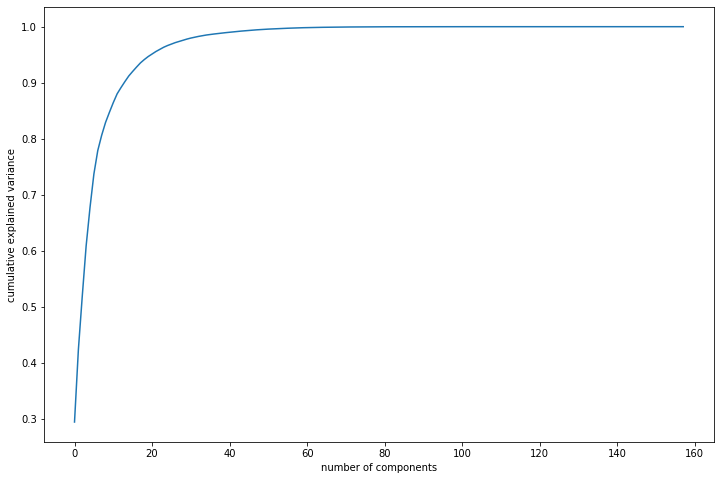

In [172]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [0]:
# First 15 components would explains 90% variance in the data
# and 20 components would explain 94% variance in the data

In [174]:
pca_train = pca.transform(Xtrain)
pca_train.shape

(35910, 158)

In [0]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_train.transpose())

In [176]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.7640413578223416 , min corr:  -0.39439618792426107


In [177]:
# Hyper parameter tuning with PCA components 20
pca = PCA(n_components=20, random_state=100)
#Doing the PCA on the train data
pca.fit(Xtrain)
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)
print (pca.explained_variance_ratio_.cumsum())

pca.explained_variance_ratio_:  [29.4 12.9  9.5  9.   6.9  6.   4.2  2.7  2.3  1.8  1.7  1.6  1.1  1.1
  1.   0.8  0.8  0.7  0.6  0.5]
[0.29413227 0.42353734 0.51888747 0.60867851 0.67733455 0.73705429
 0.77885606 0.80599671 0.82894557 0.84708878 0.86444015 0.88021158
 0.89141794 0.90198926 0.91203677 0.92014253 0.9278881  0.93531932
 0.94129664 0.94666186]


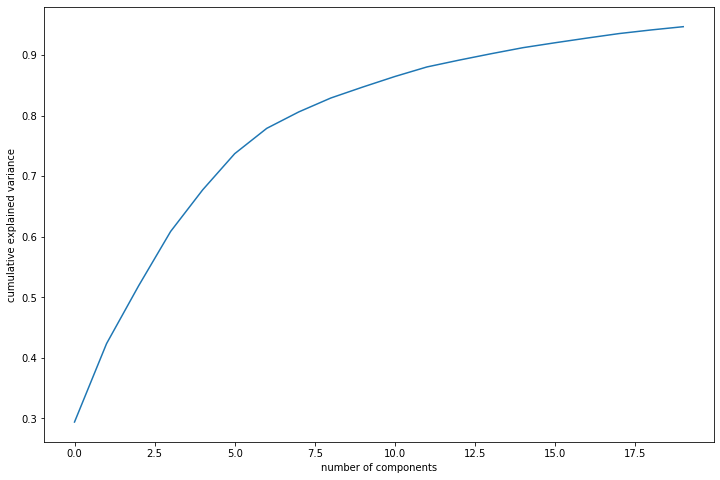

In [178]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [179]:
pca_train = pca.transform(Xtrain)
pca_train.shape

(35910, 20)

In [180]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_train.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 5.036897920317446e-06 , min corr:  -2.7222466026423947e-06


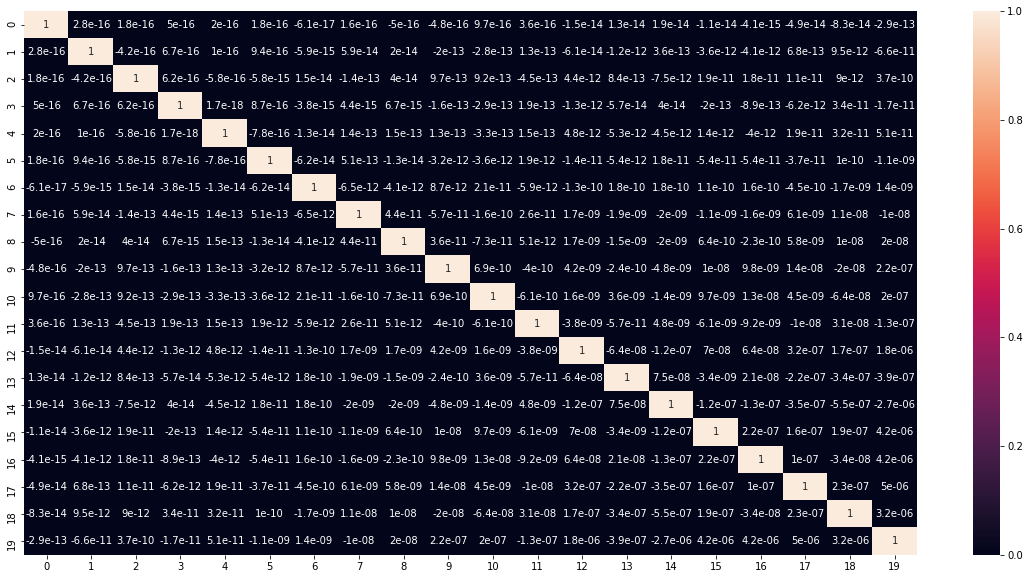

In [181]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [182]:
#Applying selected components to the test data - 20 components
pca_test = pca.transform(Xtest)
pca_test.shape

(15390, 20)

#### Logistic Regression on PCA components

In [0]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

logistic_pca = LogisticRegression(random_state=1000, class_weight='balanced')

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic_pca, hyperparameters, cv=5, verbose=0)

In [0]:
# Fit grid search
best_model = clf.fit(pca_train, y_train)

In [185]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


In [0]:
# predict class
y_pred_class = best_model.predict(pca_test)

# predict probability
y_pred_proba =best_model.predict_proba(pca_test)


In [187]:
#Making prediction on the test data
pred_probs_test = y_pred_proba[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

In [188]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

[[6127 1593]
 [1315 6355]]


In [0]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [190]:
metrics.accuracy_score(y_test, y_pred_class)

0.8110461338531514

In [191]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8285528031290743


In [192]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.7936528497409326


In [0]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [194]:
print (roc_auc)

0.8767531125237282


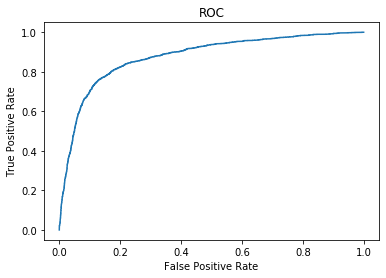

In [195]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

#### SVM on PCA components

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [0]:
# Model building

# instantiate an object of class SVC()
# note that we are using cost C=1
model = SVC(C = 1)

# fit
model.fit(pca_train, y_train)

# predict
y_pred = model.predict(pca_test)

In [236]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confusion)

[[7720    0]
 [   9 7661]]


In [237]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9994152046783625
precision 1.0
recall 0.9988265971316819


In [0]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [239]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9988265971316819


In [240]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 1.0


#### Random Forest on PCA components

In [222]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)

print("pca_train.shape:", pca_train.shape)
print("ytrain.shape:", ytrain.shape)
print("pca_test.shape:", pca_test.shape)
print("ytest.shape:", ytest.shape)

pca_train.shape: (35910, 20)
ytrain.shape: (35910, 1)
pca_test.shape: (15390, 20)
ytest.shape: (15390, 1)


In [0]:
# fit
rfc.fit(pca_train, y_train)

# Making predictions
predictions = rfc.predict(pca_test)

In [0]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [225]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7720
           1       0.97      1.00      0.98      7670

    accuracy                           0.98     15390
   macro avg       0.98      0.98      0.98     15390
weighted avg       0.98      0.98      0.98     15390



In [226]:
# Confusion matrix 
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

[[6127 1593]
 [1315 6355]]


In [227]:
print(accuracy_score(y_test,predictions))

0.9824561403508771


In [0]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [229]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8285528031290743


In [230]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.7936528497409326


### Step 6: Modeling without PCA (To Identify Interpretable features)

In [196]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)

print("Xtrain.shape:", Xtrain.shape)
print("ytrain.shape:", ytrain.shape)
print("Xtest.shape:", Xtest.shape)
print("ytest.shape:", ytest.shape)

Xtrain.shape: (35910, 158)
ytrain.shape: (35910, 1)
Xtest.shape: (15390, 158)
ytest.shape: (15390, 1)


In [0]:
# fit
rfc.fit(Xtrain, y_train)

# Making predictions
predictions = rfc.predict(Xtest)

In [0]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [199]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7720
           1       0.98      1.00      0.99      7670

    accuracy                           0.99     15390
   macro avg       0.99      0.99      0.99     15390
weighted avg       0.99      0.99      0.99     15390



In [200]:
# Confusion matrix 
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

[[6127 1593]
 [1315 6355]]


In [201]:
print(accuracy_score(y_test,predictions))

0.9885640025990903


In [0]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [203]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8285528031290743


In [204]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.7936528497409326


In [205]:

feat_labels = list(X_train.columns)
print(feat_labels)



['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [206]:
# Print the name and gini importance of each feature
for feature in zip(feat_labels, rfc.feature_importances_):
    print(feature)

('arpu_6', 0.006604922468237957)
('arpu_7', 0.008896183482401478)
('arpu_8', 0.028778230005949743)
('onnet_mou_6', 0.005537910920536254)
('onnet_mou_7', 0.004718547919394365)
('onnet_mou_8', 0.004471754129362247)
('offnet_mou_6', 0.0061180239806306)
('offnet_mou_7', 0.005524785385900256)
('offnet_mou_8', 0.012548852892957867)
('roam_ic_mou_6', 0.002511191742147856)
('roam_ic_mou_7', 0.004116988219529609)
('roam_ic_mou_8', 0.028796474258691498)
('roam_og_mou_6', 0.002411788627030726)
('roam_og_mou_7', 0.004618910292975101)
('roam_og_mou_8', 0.025647186136367888)
('loc_og_t2t_mou_6', 0.004114082360665353)
('loc_og_t2t_mou_7', 0.004761756664533955)
('loc_og_t2t_mou_8', 0.007942561845553378)
('loc_og_t2m_mou_6', 0.004036400944404817)
('loc_og_t2m_mou_7', 0.004946019005670993)
('loc_og_t2m_mou_8', 0.020670386269125776)
('loc_og_t2f_mou_6', 0.0025802551606854975)
('loc_og_t2f_mou_7', 0.008699519428633042)
('loc_og_t2f_mou_8', 0.02112656037043797)
('loc_og_t2c_mou_6', 0.0018125110153601113)
(

In [214]:
fet_ind = np.argsort(rfc.feature_importances_)[::-1]
fet_imp = rfc.feature_importances_[fet_ind]
print(fet_ind)

[ 65 101  59  53  95  11   2 104 157 116  14  23  20  80  35   8 156  29
 119  41 110 122   1  22  94  17 147  56  62  91  64  79   0  98  55  78
   6  39  40  51  58  92  32   3   7  93  52  28  27  54  19  16   4 155
  13  34  76  77  33   5  86  69  96  90  57  75  10  15  31  18  63  71
  89 146  61  30  47  99 100  45 153  70  97  67  83  60 107  46 117 114
 123  68 149  66  21  85 127 148   9 120  87 128  12 152 118  88 124 115
 126  81 121  84  43  26  24  48 125  72  73 154  25 106  42 105 135  74
 103 111 150 151 112 109 108 132  36 102  82  44 136  37 138 142 141 133
  38 137 113 139 140 143 145  50 144 129 130 134  49 131]


In [216]:
print(X_train.columns[65])
labels = X_train.columns[fet_ind]
print(labels)

loc_ic_mou_8
Index(['loc_ic_mou_8', 'last_day_rch_amt_8', 'loc_ic_t2m_mou_8',
       'total_og_mou_8', 'total_rech_amt_8', 'roam_ic_mou_8', 'arpu_8',
       'total_rech_data_8', 'day_of_last_rech_8', 'av_rech_amt_data_8',
       ...
       'monthly_3g_8', 'sachet_3g_8', 'fb_user_7', 'og_others_8', 'fb_user_6',
       'night_pck_user_6', 'night_pck_user_7', 'monthly_2g_8', 'og_others_7',
       'night_pck_user_8'],
      dtype='object', length=158)


Text(0.5, 1.0, 'Features importance')

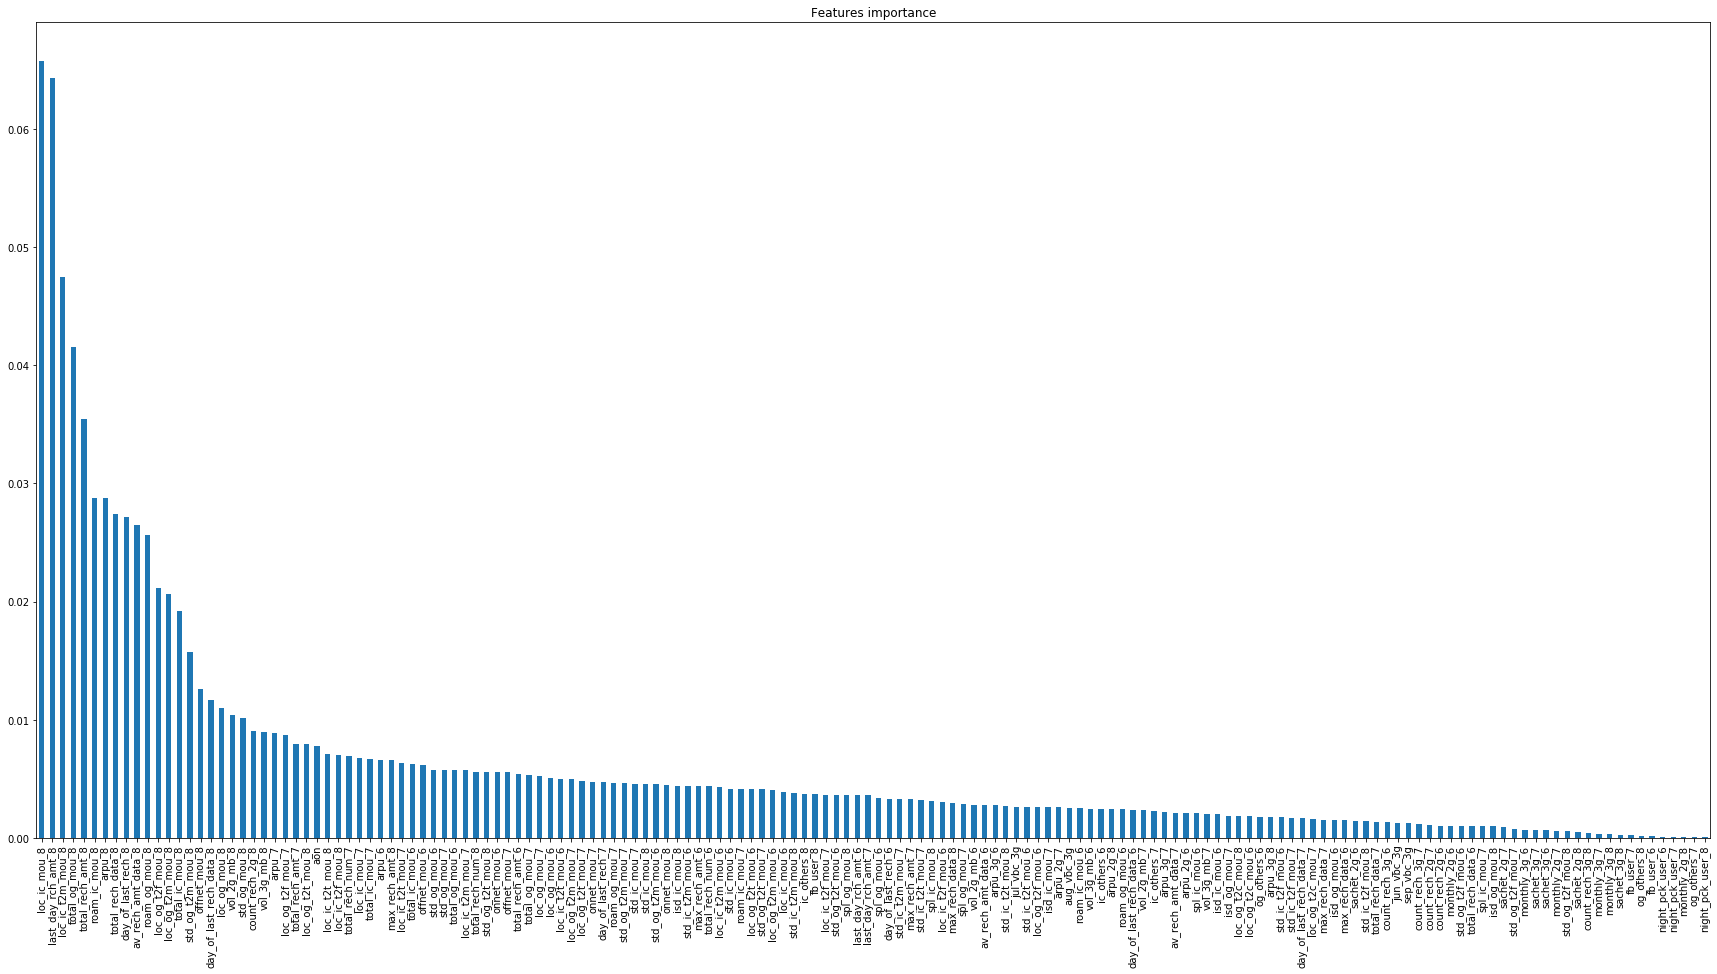

In [219]:
fig, ax = plt.subplots(1, 1, figsize=(30, 15))
labels =  X_train.columns[fet_ind]
pd.Series(fet_imp, index=labels).plot('bar', ax=ax)
ax.set_title('Features importance')

In [221]:
print(labels[0:20])

Index(['loc_ic_mou_8', 'last_day_rch_amt_8', 'loc_ic_t2m_mou_8',
       'total_og_mou_8', 'total_rech_amt_8', 'roam_ic_mou_8', 'arpu_8',
       'total_rech_data_8', 'day_of_last_rech_8', 'av_rech_amt_data_8',
       'roam_og_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_8',
       'total_ic_mou_8', 'std_og_t2m_mou_8', 'offnet_mou_8',
       'day_of_last_rech_data_8', 'loc_og_mou_8', 'vol_2g_mb_8',
       'std_og_mou_8'],
      dtype='object')


## Feature Recommendation
### Below are 20 most important features

- loc_ic_mou_8', 
- last_day_rch_amt_8', 
- loc_ic_t2m_mou_8',
- total_og_mou_8', 
- total_rech_amt_8', 
- roam_ic_mou_8',
- arpu_8',
- total_rech_data_8',
- day_of_last_rech_8',
- av_rech_amt_data_8',
- roam_og_mou_8', 
- loc_og_t2f_mou_8', 
- loc_og_t2m_mou_8',
- total_ic_mou_8',
- std_og_t2m_mou_8',
- offnet_mou_8',
- day_of_last_rech_data_8',
- loc_og_mou_8',
- vol_2g_mb_8',
- std_og_mou_8'

### It looks like if Customer is active using voice and data in the previous month it is very unlikely that customer would churn.

## Model Recommendation
### SVM with PCA is promising specificity 1.0 which really good. Hence we recommend SVM with PCA model if feature explaination is not required

### If feature explanation is required then we recommend Random Forest model which is giving specificity 0.7936528497409326%